
# Project: Wrangle and Analyse Data (WE_RATE_DOGS TWITTER ARCHIVE)

## Table of Contents
<ul>
<li><a href="#INTRODUCTION">Introduction</a></li>
<li><a href="#DATA-GATHERING">Data Gathering</a></li>
<li><a href="#ASSESSING-DATA">Assessing Data</a></li>
<li><a href="#DATA-CLEANING">Data Cleaning</a></li>
<li><a href="#STORING-DATA">Storing Data</a></li> 
<li><a href="#ANALYZING-AND-VISUALIZING-DATA">Analyzing and Visualizing Data</a></li>
<li><a href="#CONCLUSION">Conclusion</a></li>
    
</ul>

# INTRODUCTION

The goal of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering was done,then assessing and cleaning for worthy analyses and visualizations.

The three datasets worked upon are:

1. Enhanced Twitter Archive
The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. The data dictionary are:
   1. tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
   2. in_reply_to_status_id- if the represented Tweet is a reply to an original tweet, this column will contain the original Tweet’s ID        
   3. in_reply_to_user_id -if the represented Tweet is a reply to an original tweet, this column will contain the original Tweet writer’s ID                
   4. timestamp  - time of tweet creation                  
   5. source   - means of tweeting                   
   6. text  - status update about the picture posted                       
   7. retweeted_status_id - if the represented Tweet is a reply to a retweet, this column will contain the original retweet’s ID            
   8. retweeted_status_user_id -if the represented Tweet is a reply to a retweet, this column will contain the original retweet writer's ID           
   9. retweeted_status_timestamp- time of retweet  
  10. expanded_urls    - tweet url        
  11. rating_numerator -  numerator of the rating of a dog,ratings almost always greater than 10              
  12. rating_denominator - denominator of the rating of a dog           
  13. name  - name of dog                      
  14. doggo  - dog stage                      
  15. floofer- dog stage                      
  16. pupper - dog stage                     
  17. puppo  - dog stage
  
  
2. Tweet JSON txt File
This was gathered by querying Twitter's API. For the basic-ness of Twitter archives, the tweet json file contains the retweet count and favorite count which are notable columns needed for this project. The data dictionary are:
  1. tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921       
  2. date_created  -date tweet was created  
  3. favorite_count - number of tweet's like
  4. retweet_count - number of tweet's retweet


3. Image Predictions File
This is a file that contains a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images). The data dictionary include:
   1. tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
   2. p1 is the algorithm's #1 prediction for the image in the tweet 
   3. p1_conf is how confident the algorithm is in its #1 prediction 
   4. p1_dog is whether or not the #1 prediction is a breed of dog 
   5. p2 is the algorithm's second most likely prediction 
   6. p2_conf is how confident the algorithm is in its #2 prediction 
   7. p2_dog is whether or not the #2 prediction is a breed of dog
   8. p3_conf is how confident the algorithm is in its #3 prediction 
   9. p3_dog is whether or not the #3 prediction is a breed of dog

# DATA WRANGLING PROCESS

 Gathering, assessing, and cleaning of the datasets was done.

# DATA GATHERING

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import requests
import json
import os
from timeit import default_timer as timer
import time
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

#### Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#create directory for the image prediction file
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
# get the file from the url using requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response


<Response [200]>

In [6]:
#open the file
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [6]:
#read the file created
image_predictions= pd.read_csv('image-predictions.tsv',sep='\t')
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

#### Downloading the WeRateDogs Twitter archive data  (twitter_archive_enhanced.csv) directly

In [7]:
#read the twitter archive file
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

#### Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [14]:
#install tweepy to access the Twitter API
pip install tweepy[async]

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.


  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0


In [18]:
#import the needed libraries
import tweepy
from tweepy import OAuthHandler

In [19]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


In [20]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids= twitter_archive.tweet_id.values
len(tweet_ids)


2356

In [21]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count=0
fails_dict={}
start=timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt','w') as outfile:
     # This loop took 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count+=1
        print(str(count) + ':' + str(tweet_id))
        try:
            tweet=api.get_status(tweet_id,tweet_mode='extended')
            print('success')
            json.dump(tweet._json,outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print('fail')
            fails_dict[tweet_id]=e
            pass
    end=timer()
    api=tweepy.API(auth,wait_on_rate_limit=True,sleep_on_rate_limit=False)
    print(end-start)
    print(fails_dict)

1:892420643555336193
success
2:892177421306343426
success
3:891815181378084864
success
4:891689557279858688
success
5:891327558926688256
success
6:891087950875897856
success
7:890971913173991426
success
8:890729181411237888
success
9:890609185150312448
success
10:890240255349198849
success
11:890006608113172480
success
12:889880896479866881
success
13:889665388333682689
success
14:889638837579907072
success
15:889531135344209921
success
16:889278841981685760
success
17:888917238123831296
success
18:888804989199671297
success
19:888554962724278272
success
20:888202515573088257
fail
21:888078434458587136
success
22:887705289381826560
success
23:887517139158093824
success
24:887473957103951883
success
25:887343217045368832
success
26:887101392804085760
success
27:886983233522544640
success
28:886736880519319552
success
29:886680336477933568
success
30:886366144734445568
success
31:886267009285017600
success
32:886258384151887873
success
33:886054160059072513
success
34:885984800019947520


success
271:841314665196081154
success
272:841077006473256960
success
273:840761248237133825
success
274:840728873075638272
success
275:840698636975636481
success
276:840696689258311684
success
277:840632337062862849
success
278:840370681858686976
success
279:840268004936019968
success
280:839990271299457024
success
281:839549326359670784
success
282:839290600511926273
success
283:839239871831150596
success
284:838952994649550848
success
285:838921590096166913
success
286:838916489579200512
success
287:838831947270979586
success
288:838561493054533637
success
289:838476387338051585
success
290:838201503651401729
success
291:838150277551247360
success
292:838085839343206401
success
293:838083903487373313
success
294:837820167694528512
success
295:837482249356513284
success
296:837471256429613056
success
297:837366284874571778
fail
298:837110210464448512
success
299:837012587749474308
fail
300:836989968035819520
success
301:836753516572119041
success
302:836677758902222849
success
303:83

success
536:807059379405148160
success
537:807010152071229440
success
538:806629075125202948
success
539:806620845233815552
success
540:806576416489959424
success
541:806542213899489280
success
542:806242860592926720
success
543:806219024703037440
success
544:805958939288408065
success
545:805932879469572096
success
546:805826884734976000
success
547:805823200554876929
success
548:805520635690676224
success
549:805487436403003392
success
550:805207613751304193
success
551:804738756058218496
success
552:804475857670639616
success
553:804413760345620481
success
554:804026241225523202
success
555:803773340896923648
success
556:803692223237865472
success
557:803638050916102144
success
558:803380650405482500
success
559:803321560782307329
success
560:803276597545603072
success
561:802952499103731712
success
562:802624713319034886
success
563:802600418706604034
success
564:802572683846291456
success
565:802323869084381190
success
566:802265048156610565
success
567:802247111496568832
fail
568

success
801:772615324260794368
success
802:772581559778025472
success
803:772193107915964416
success
804:772152991789019136
success
805:772117678702071809
success
806:772114945936949249
success
807:772102971039580160
success
808:771908950375665664
success
809:771770456517009408
success
810:771500966810099713
success
811:771380798096281600
success
812:771171053431250945
success
813:771136648247640064
success
814:771102124360998913
success
815:771014301343748096
success
816:771004394259247104
fail
817:770787852854652928
success
818:770772759874076672
success
819:770743923962707968
fail
820:770655142660169732
success
821:770414278348247044
success
822:770293558247038976
success
823:770093767776997377
success
824:770069151037685760
success
825:769940425801170949
success
826:769695466921623552
success
827:769335591808995329
success
828:769212283578875904
success
829:768970937022709760
success
830:768909767477751808
success
831:768855141948723200
success
832:768609597686943744
success
833:76

success
1064:741067306818797568
success
1065:740995100998766593
success
1066:740711788199743490
success
1067:740699697422163968
success
1068:740676976021798912
success
1069:740373189193256964
success
1070:740365076218183684
success
1071:740359016048689152
success
1072:740214038584557568
success
1073:739979191639244800
success
1074:739932936087216128
success
1075:739844404073074688
success
1076:739623569819336705
success
1077:739606147276148736
success
1078:739544079319588864
success
1079:739485634323156992
success
1080:739238157791694849
success
1081:738891149612572673
success
1082:738885046782832640
success
1083:738883359779196928
success
1084:738537504001953792
success
1085:738402415918125056
success
1086:738184450748633089
success
1087:738166403467907072
success
1088:738156290900254721
success
1089:737826014890496000
success
1090:737800304142471168
success
1091:737678689543020544
success
1092:737445876994609152
success
1093:737322739594330112
success
1094:737310737551491075
success


success
1321:706346369204748288
success
1322:706310011488698368
success
1323:706291001778950144
success
1324:706265994973601792
success
1325:706169069255446529
success
1326:706166467411222528
success
1327:706153300320784384
success
1328:705975130514706432
success
1329:705970349788291072
success
1330:705898680587526145
success
1331:705786532653883392
success
1332:705591895322394625
success
1333:705475953783398401
success
1334:705442520700944385
success
1335:705428427625635840
success
1336:705239209544720384
success
1337:705223444686888960
success
1338:705102439679201280
success
1339:705066031337840642
success
1340:704871453724954624
success
1341:704859558691414016
success
1342:704847917308362754
success
1343:704819833553219584
success
1344:704761120771465216
success
1345:704499785726889984
success
1346:704491224099647488
success
1347:704480331685040129
success
1348:704364645503647744
success
1349:704347321748819968
fail
1350:704134088924532736
fail
1351:704113298707505153
fail
1352:7040

success
1591:686618349602762752
success
1592:686606069955735556
success
1593:686394059078897668
success
1594:686386521809772549
success
1595:686377065986265092
success
1596:686358356425093120
success
1597:686286779679375361
success
1598:686050296934563840
success
1599:686035780142297088
success
1600:686034024800862208
success
1601:686007916130873345
success
1602:686003207160610816
success
1603:685973236358713344
success
1604:685943807276412928
success
1605:685906723014619143
success
1606:685681090388975616
success
1607:685667379192414208
success
1608:685663452032069632
success
1609:685641971164143616
success
1610:685547936038666240
success
1611:685532292383666176
success
1612:685325112850124800
success
1613:685321586178670592
success
1614:685315239903100929
success
1615:685307451701334016
success
1616:685268753634967552
success
1617:685198997565345792
success
1618:685169283572338688
success
1619:684969860808454144
success
1620:684959798585110529
success
1621:684940049151070208
success


success
1848:675820929667219457
success
1849:675798442703122432
success
1850:675781562965868544
success
1851:675740360753160193
success
1852:675710890956750848
success
1853:675707330206547968
success
1854:675706639471788032
success
1855:675534494439489536
success
1856:675531475945709568
success
1857:675522403582218240
success
1858:675517828909424640
success
1859:675501075957489664
success
1860:675497103322386432
success
1861:675489971617296384
success
1862:675483430902214656
success
1863:675432746517426176
success
1864:675372240448454658
success
1865:675362609739206656
success
1866:675354435921575936
success
1867:675349384339542016
success
1868:675334060156301312
success
1869:675166823650848770
success
1870:675153376133427200
success
1871:675149409102012420
success
1872:675147105808306176
success
1873:675146535592706048
success
1874:675145476954566656
success
1875:675135153782571009
success
1876:675113801096802304
success
1877:675111688094527488
success
1878:675109292475830276
success


success
2105:670668383499735048
success
2106:670474236058800128
success
2107:670468609693655041
success
2108:670465786746662913
success
2109:670452855871037440
success
2110:670449342516494336
success
2111:670444955656130560
success
2112:670442337873600512
success
2113:670435821946826752
success
2114:670434127938719744
success
2115:670433248821026816
success
2116:670428280563085312
success
2117:670427002554466305
success
2118:670421925039075328
success
2119:670420569653809152
success
2120:670417414769758208
success
2121:670411370698022913
success
2122:670408998013820928
success
2123:670403879788544000
success
2124:670385711116361728
success
2125:670374371102445568
success
2126:670361874861563904
success
2127:670338931251150849
success
2128:670319130621435904
success
2129:670303360680108032
success
2130:670290420111441920
success
2131:670093938074779648
success
2132:670086499208155136
success
2133:670079681849372674
success
2134:670073503555706880
success
2135:670069087419133954
success


TypeError: __init__() got an unexpected keyword argument 'sleep_on_rate_limit'

In [24]:
# read the json text into a dataframe
df_list=[]
with open ('tweet_json.txt','r') as json_file:
    for line in json_file:
        data=json.loads(line)
        tweet_id=data['id']
        created_at=data['created_at']
        favorite_count= data['favorite_count']
        retweet_count= data['retweet_count']
        df_list.append({'tweet_id':tweet_id,'date_created':created_at,'favorite_count':favorite_count,'retweet_count':retweet_count})
#creating a dataframe from the list
tweet_df= pd.DataFrame(df_list,columns=['tweet_id','date_created','favorite_count','retweet_count'])
tweet_df
    

tweet_id                    date_created  favorite_count  \
0     892420643555336193  Tue Aug 01 16:23:56 +0000 2017           33702   
1     892177421306343426  Tue Aug 01 00:17:27 +0000 2017           29232   
2     891815181378084864  Mon Jul 31 00:18:03 +0000 2017           21975   
3     891689557279858688  Sun Jul 30 15:58:51 +0000 2017           36779   
4     891327558926688256  Sat Jul 29 16:00:24 +0000 2017           35166   
...                  ...                             ...             ...   
2181  666049248165822465  Mon Nov 16 00:24:50 +0000 2015              88   
2182  666044226329800704  Mon Nov 16 00:04:52 +0000 2015             245   
2183  666033412701032449  Sun Nov 15 23:21:54 +0000 2015             100   
2184  666029285002620928  Sun Nov 15 23:05:30 +0000 2015             112   
2185  666020888022790149  Sun Nov 15 22:32:08 +0000 2015            2283   

      retweet_count  
0              6976  
1              5280  
2              3466  
3              7190  
4              7723  
...             ...  
2181             36  
2182            115  
2183             36  
2184             39  
2185            420  

[2186 rows x 4 columns]

In [25]:
# save the dataframe into a csv file
tweet_df.to_csv('WeRateDogs_tweets.csv',index=False)

In [8]:
# read the csv file
dog_count=pd.read_csv('WeRateDogs_tweets.csv')
dog_count.head()

tweet_id                    date_created  favorite_count  \
0  892420643555336193  Tue Aug 01 16:23:56 +0000 2017           33702   
1  892177421306343426  Tue Aug 01 00:17:27 +0000 2017           29232   
2  891815181378084864  Mon Jul 31 00:18:03 +0000 2017           21975   
3  891689557279858688  Sun Jul 30 15:58:51 +0000 2017           36779   
4  891327558926688256  Sat Jul 29 16:00:24 +0000 2017           35166   

   retweet_count  
0           6976  
1           5280  
2           3466  
3           7190  
4           7723

# ASSESSING DATA

#### VISUAL ASSESSMENT
Visual assessment was carried out using Google sheets and Microsoft Excel for better assessment

In [11]:
twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                                                  source  \
0     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
...                                                                                  ...   
2351  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2352  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2353  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2354  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2355  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                    text  \
0                                                          This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1     This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                      This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                                This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4     This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   
...                                                                                                                                                                  ...   
2351                                            Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq   
2352                           This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx   
2353                                  Here is a very happy pup. Big fan of we

In [3]:
#expand the column width to view full text
pd.set_option('display.max_colwidth',199)

In [10]:
image_predictions

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [12]:
dog_count

tweet_id                    date_created  favorite_count  \
0     892420643555336193  Tue Aug 01 16:23:56 +0000 2017           33702   
1     892177421306343426  Tue Aug 01 00:17:27 +0000 2017           29232   
2     891815181378084864  Mon Jul 31 00:18:03 +0000 2017           21975   
3     891689557279858688  Sun Jul 30 15:58:51 +0000 2017           36779   
4     891327558926688256  Sat Jul 29 16:00:24 +0000 2017           35166   
...                  ...                             ...             ...   
2181  666049248165822465  Mon Nov 16 00:24:50 +0000 2015              88   
2182  666044226329800704  Mon Nov 16 00:04:52 +0000 2015             245   
2183  666033412701032449  Sun Nov 15 23:21:54 +0000 2015             100   
2184  666029285002620928  Sun Nov 15 23:05:30 +0000 2015             112   
2185  666020888022790149  Sun Nov 15 22:32:08 +0000 2015            2283   

      retweet_count  
0              6976  
1              5280  
2              3466  
3              7190  
4              7723  
...             ...  
2181             36  
2182            115  
2183             36  
2184             39  
2185            420  

[2186 rows x 4 columns]

#### PROGRAMMATIC ASSESSMENT

In [13]:
#show the information about each column
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
#  show 50 records randomly
twitter_archive.sample(50)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
904   758355060040593408                    NaN                  NaN   
1625  684830982659280897                    NaN                  NaN   
1206  715758151270801409                    NaN                  NaN   
842   766793450729734144                    NaN                  NaN   
1356  703425003149250560           7.030419e+17         4.196984e+09   
1558  688789766343622656                    NaN                  NaN   
2134  670069087419133954                    NaN                  NaN   
967   750381685133418496           7.501805e+17         4.717297e+09   
1055  742385895052087300                    NaN                  NaN   
757   778624900596654080                    NaN                  NaN   
1474  693644216740769793           6.936422e+17         4.196984e+09   
1940  673716320723169284           6.737159e+17         4.196984e+09   
672   789903600034189313                    NaN                  NaN   
264   842163532590374912                    NaN                  NaN   
2142  669972011175813120                    NaN                  NaN   
939   753039830821511168                    NaN                  NaN   
1774  678023323247357953           6.780211e+17         4.196984e+09   
555   803692223237865472                    NaN                  NaN   
1421  698195409219559425                    NaN                  NaN   
661   791026214425268224                    NaN                  NaN   
718   783466772167098368                    NaN                  NaN   
288   838476387338051585                    NaN                  NaN   
709   785170936622350336                    NaN                  NaN   
705   785639753186217984                    NaN                  NaN   
1543  689557536375177216                    NaN                  NaN   
1953  673662677122719744                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
631   794205286408003585                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
2270  667502640335572993                    NaN                  NaN   
337   832397543355072512                    NaN                  NaN   
825   769695466921623552                    NaN                  NaN   
401   824663926340194305                    NaN                  NaN   
2127  670319130621435904                    NaN                  NaN   
351   831322785565769729                    NaN                  NaN   
2118  670420569653809152                    NaN                  NaN   
35    885518971528720385                    NaN                  NaN   
2022  672068090318987265                    NaN                  NaN   
174   858107933456039936                    NaN                  NaN   
2166  669363888236994561                    NaN                  NaN   
1836  676098748976615425                    NaN                  NaN   
499   813127251579564032                    NaN                  NaN   
1417  698549713696649216                    NaN                  NaN   
1013  747219827526344708                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
370   828409743546925057                    NaN                  NaN   
1728  679872969355714560                    NaN                  NaN   
2230  668237644992782336                    NaN                  NaN   
879   760641137271070720                    NaN                  NaN   
985   749075273010798592                    NaN                  NaN   

                      timestamp  \
904   2016-07-27 17:35:10 +0000   
1625  2016-01-06 20:16:44 +0000   
1206  2016-04-01 04:30:16 +0000   
842   2016-08-20 00:26:19 +0000   
1356  2016-02-27 03:42:44 +0000   
1558  2016-01-17 18:27:32 +0000   
2134  2015-11-27 02:38:14 +0000   
967   2016-07-05 17:31:49 +0000   
1055  2016-06-13 15:59:24 +0

In [23]:
# show the mathematical description of numerical column
twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [48]:
#show the number of row and column
twitter_archive.shape

(2356, 17)

In [49]:
# show the number of null values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [50]:
# show the number of unique values
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [51]:
# show the total number of each value in the rating numerator column
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [52]:
# show the total number of each value in the rating denominator column
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [26]:
# show the total number of duplicated values in the source column
twitter_archive.source.duplicated().sum()

2352

In [231]:
# to view all the rows in the dataframe
pd.set_option('display.max_rows', None)

In [39]:
#  show the number of each value present in the dog name column
twitter_archive.name.value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Tucker             10
Penny              10
Lola               10
Winston             9
Bo                  9
Sadie               8
the                 8
Daisy               7
Buddy               7
Toby                7
an                  7
Bailey              7
Leo                 6
Oscar               6
Stanley             6
Rusty               6
Bella               6
Dave                6
Jack                6
Koda                6
Scout               6
Jax                 6
Milo                6
Louis               5
Phil                5
Sammy               5
Gus                 5
Chester             5
Alfie               5
Sunny               5
Bentley             5
very                5
Oakley              5
Finn                5
George              5
Larry               5
Clarence            4
Loki                4
Walter              4
Reggie    

In [40]:
# show 50 records randomly from the image prediction dataset
image_predictions.sample(50)

tweet_id  \
1203  741438259667034112   
984   707420581654872064   
1493  783085703974514689   
1512  786363235746385920   
422   674051556661161984   
1967  867900495410671616   
1722  819711362133872643   
2044  886258384151887873   
495   675740360753160193   
1813  833479644947025920   
156   668826086256599040   
1334  757741869644341248   
1174  737322739594330112   
1500  783839966405230592   
817   692894228850999298   
146   668627278264475648   
242   670449342516494336   
793   690735892932222976   
1158  733822306246479872   
63    667165590075940865   
1197  740676976021798912   
1031  711363825979756544   
1996  874680097055178752   
1975  870063196459192321   
1465  778624900596654080   
1625  803773340896923648   
1110  724004602748780546   
1226  745057283344719872   
1410  770655142660169732   
2074  892420643555336193   
1380  765222098633691136   
1800  831911600680497154   
1909  852912242202992640   
1131  728046963732717569   
462   674805413498527744   
1836  837110210464448512   
830   693629975228977152   
10    666063827256086533   
24    666353288456101888   
842   695051054296211456   
348   672481316919734272   
1204  741743634094141440   
1563  793601777308463104   
859   696894894812565505   
1963  867051520902168576   
1217  743595368194129920   
471   675135153782571009   
324   671879137494245376   
572   678410210315247616   
1121  726887082820554753   

                                                                                      jpg_url  \
1203                                          https://pbs.twimg.com/media/CkoeKTPWYAAcWmo.jpg   
984                                           https://pbs.twimg.com/media/CdFDQVgWIAArslx.jpg   
1493                                          https://pbs.twimg.com/media/Ct4URfWUAAQ7lKe.jpg   
1512                                          https://pbs.twimg.com/media/Cum5LlfWAAAyPcS.jpg   
422                                           https://pbs.twimg.com/media/CVq2UHwWEAAduMw.jpg   
1967                                          https://pbs.twimg.com/media/DAtm5MkXoAA4R6P.jpg   
1722                                          https://pbs.twimg.com/media/C2AzHjQWQAApuhf.jpg   
2044                                          https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg   
495   https://pbs.twimg.com/ext_tw_video_thumb/675740268751138818/pu/img/dVaVeFAVT-lk_1ZV.jpg   
1813                                          https://pbs.twimg.com/media/C5EdT4jWEAARv2C.jpg   
156                                           https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg   
1334                                          https://pbs.twimg.com/media/CoQKNY7XYAE_cuX.jpg   
1174                                          https://pbs.twimg.com/media/Cjt_Hm6WsAAjkPG.jpg   
1500                                          https://pbs.twimg.com/media/CuDCSM-XEAAJw1W.jpg   
817                                           https://pbs.twimg.com/media/CZ2nn7BUsAI2Pj3.jpg   
146                                           https://pbs.twimg.com/media/CUdw9thWsAA4mB9.jpg   
242                                           https://pbs.twimg.com/media/CU3qHNTWsAApGr0.jpg   
793                                           https://pbs.twimg.com/media/CZX8nyeVAAEstKM.jpg   
1158                                          https://pbs.twimg.com/media/Ci8Pfg_UUAA2m9i.jpg   
63                                            https://pbs.twimg.com/media/CUI_kHBWsAAAef5.jpg   
1197                                          https://pbs.twimg.com/media/Ckdpx5KWsAANF6b.jpg   
1031                                          https://pbs.twimg.com/media/Cd9Fn5QUMAAYMT4.jpg   
1996                                          https://pbs.twimg.com/media/DCN85nGUwAAzG_q.jpg   
1975                                          https://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg   
1465                                          https://pbs.twimg.com/media/Cs47N3eWcAEmgiW.jpg   
1625                                          https://pbs.twimg.c

In [41]:
# show informaation about each column present in the image prediction dataset
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [42]:
# show the mathematical description of the numerical columns in the dataset
image_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [44]:
# show the number of rows and columns present in the dataset
image_predictions.shape

(2075, 12)

In [46]:
# show the number of null value in the dataset
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [47]:
# show the number of unique values in each dataset
image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [53]:
# show the total number of each value in the image number column
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [54]:
# show 50 records from the dataset randomly
dog_count.sample(50)

tweet_id                    date_created  favorite_count  \
805   768909767477751808  Thu Aug 25 20:35:48 +0000 2016               0   
612   793962221541933056  Wed Nov 02 23:45:19 +0000 2016           15861   
269   838952994649550848  Tue Mar 07 03:22:35 +0000 2017           18327   
1425  686377065986265092  Mon Jan 11 02:40:19 +0000 2016            2042   
316   832769181346996225  Sat Feb 18 01:50:19 +0000 2017               0   
2146  666649482315059201  Tue Nov 17 16:09:56 +0000 2015             991   
1605  678021115718029313  Sat Dec 19 01:16:45 +0000 2015           12339   
2085  667773195014021121  Fri Nov 20 18:35:10 +0000 2015             204   
1210  712092745624633345  Tue Mar 22 01:45:15 +0000 2016            2705   
1196  714141408463036416  Sun Mar 27 17:25:54 +0000 2016            4002   
1703  675145476954566656  Fri Dec 11 02:49:59 +0000 2015            1913   
1685  675531475945709568  Sat Dec 12 04:23:49 +0000 2015            1063   
2183  666033412701032449  Sun Nov 15 23:21:54 +0000 2015             100   
1218  711652651650457602  Sun Mar 20 20:36:28 +0000 2016            3538   
1071  735648611367784448  Thu May 26 01:47:51 +0000 2016            3725   
1233  710140971284037632  Wed Mar 16 16:29:35 +0000 2016            2515   
1487  683357973142474752  Sat Jan 02 18:43:31 +0000 2016            2663   
1908  670832455012716544  Sun Nov 29 05:11:35 +0000 2015             645   
983   747242308580548608  Mon Jun 27 01:37:04 +0000 2016               0   
1671  675878199931371520  Sun Dec 13 03:21:34 +0000 2015            3781   
1860  671789708968640512  Tue Dec 01 20:35:22 +0000 2015            6298   
1438  685663452032069632  Sat Jan 09 03:24:40 +0000 2016            2970   
1810  672975131468300288  Sat Dec 05 03:05:49 +0000 2015            1498   
1707  675109292475830276  Fri Dec 11 00:26:12 +0000 2015            2514   
1571  679475951516934144  Wed Dec 23 01:37:45 +0000 2015            1915   
878   758099635764359168  Wed Jul 27 00:40:12 +0000 2016           17653   
641   791026214425268224  Tue Oct 25 21:18:40 +0000 2016               0   
466   814638523311648768  Fri Dec 30 01:05:33 +0000 2016           10660   
819   766693177336135680  Fri Aug 19 17:47:52 +0000 2016            3783   
1171  716730379797970944  Sun Apr 03 20:53:33 +0000 2016            1132   
1399  687818504314159109  Fri Jan 15 02:08:05 +0000 2016            2281   
36    885167619883638784  Wed Jul 12 16:03:00 +0000 2017           19188   
69    879008229531029506  Sun Jun 25 16:07:47 +0000 2017           16721   
1513  681891461017812993  Tue Dec 29 17:36:07 +0000 2015            2269   
2022  668932921458302977  Mon Nov 23 23:23:31 +0000 2015             227   
1220  711306686208872448  Sat Mar 19 21:41:44 +0000 2016            3040   
770   773670353721753600  Wed Sep 07 23:52:41 +0000 2016            5040   
1692  675432746517426176  Fri Dec 11 21:51:30 +0000 2015            1361   
133   865359393868664832  Fri May 19 00:12:11 +0000 2017           23516   
1100  729463711119904772  Mon May 09 00:11:16 +0000 2016            5311   
974   747844099428986880  Tue Jun 28 17:28:22 +0000 2016            2616   
1812  672968025906282496  Sat Dec 05 02:37:35 +0000 2015            1180   
1001  745433870967832576  Wed Jun 22 01:50:58 +0000 2016            6520   
1510  682032003584274432  Wed Dec 30 02:54:35 +0000 2015            6037   
1508  682059653698686977  Wed Dec 30 04:44:28 +0000 2015            4529   
854   760641137271070720  Wed Aug 03 00:59:13 +0000 2016            4661   
1819  672828477930868736  Fri Dec 04 17:23:04 +0000 2015            1109   
957   749064354620928000  Sat Jul 02 02:17:13 +0000 2016            4488   
726   780074436359819264  Sun Sep 25 16:00:13 +0000 2016           11389   
1237  709852847387627521  Tue Mar 15 21:24:41 +0000 2016            3232   

      retweet_count  
805            2430  
612            4557  
269            3659  
1425            514  
316              38  
2146   

In [55]:
# show the information about each column in the dataset
dog_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2186 non-null   int64 
 1   date_created    2186 non-null   object
 2   favorite_count  2186 non-null   int64 
 3   retweet_count   2186 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 68.4+ KB


In [56]:
# show the number of rows and columns present
dog_count.shape

(2186, 4)

In [57]:
#show the number of null values in the dataset
dog_count.isnull().sum()

tweet_id          0
date_created      0
favorite_count    0
retweet_count     0
dtype: int64

In [58]:
# show the number of unique values in each column
dog_count.nunique()

tweet_id          2186
date_created      2186
favorite_count    1856
retweet_count     1593
dtype: int64

In [59]:
# show the mathematical description of the numerical columns
dog_count.describe()

tweet_id  favorite_count  retweet_count
count  2.186000e+03     2186.000000    2186.000000
mean   7.445631e+17     7264.008234    2544.398445
std    6.945186e+16    11180.438010    4265.092522
min    6.660209e+17        0.000000       1.000000
25%    6.768728e+17     1112.750000     489.250000
50%    7.307490e+17     3200.500000    1231.000000
75%    8.022586e+17     9129.250000    2970.250000
max    8.924206e+17   144278.000000   70406.000000

## ASSESSMENT RESULT

#### QUALITY ISSUES

[TWITTER ARCHIVE DATASET]
1. Erroneous data type of timestamp and tweet_id columns
2. in_reply_to_status id and in_reply_to_user_id columns,Retweeted_status_id,retweeted_status_user_id, and retweted_sttus_timestamp columns have so many null entries
3. Some rating_denominators are not 10 
4. Expanded_urls column has some null entries
5. Some dogs without names were given a,an,the,not,by,all,my,None instead of null
6. Source column has https tag attached to it
7. Nulls represented as none in Doggo,floofer,pupper,puppo and dog name coloumns 
8. Text column has https tag attched to it
9. The timestamp has extra zeros added to it values
10. Some rating_numerators are equal to 0 and large numbers


[IMAGE PREDICTIONS]
1. Names of dog breed start with capital and small letters and contain underscore instead of spaces in P1,P2 and P3 columns.
2. Erroneous data type of tweet_id columns
3. Misssing records
4. Some predictions contains 3 false values which means they are not dog picture tweets


[WERATE DOG_TWEET]
1. Erroneous data type of date created and tweet_id columns
2. Missing records
3.  The date created column has extra zeros added to it values

Generally,
1. All 3 datasets have different number of records.
2. The timestamp and date_created columns have the same values,duplicated columns are not needed. Date_created column will be dropped.
3. Some column names have to be renamed for clearer description.





#### TIDINESS ISSUE
1. In the twitter archive enhanced dataset,there is redundant stage columns of dog[floofer,doggo,pupper,puppo],only one stage column is needed.
2. In the image predictions dataset,there is redundant prediction columns of dog breed and [p1,p2,p3],only the right prediction breed column and prediction confidence is needed. 
3. 3 seperate datasets are not needed,one table is enough.


# DATA CLEANING

In [237]:
#make a copy of all dataset before cleaning
twitter_archive_clean=twitter_archive.copy()
image_predictions_clean=image_predictions.copy()
dog_count_clean=dog_count.copy()

### TWITTER ARCHIVE ENHANCED DATASET
#### QUALITY ISSUES

##### ISSUE #1


#### Define
Change the datatype of the timestamp to datetime and tweets_id to object using .astype() method

#### Code

In [239]:
# use the astype() method to change the datatype
twitter_archive_clean['timestamp']= twitter_archive_clean['timestamp'].astype('datetime64[ns]')

In [240]:
# use the astype method to change the datatype
twitter_archive_clean['tweet_id']=twitter_archive_clean['tweet_id'].astype(object)

#### Test

In [241]:
# check the datatype
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

#### ISSUE #2

#### Define
in_reply_to_status id and in_reply_to_user_id columns,Retweeted_status_id,retweeted_status_user_id, and retweted_status_timestamp can be drop  since they are not needed in our analysis. We need only data with original tweets not retweets

#### Code

In [242]:
# keep only rows without retweeted status values
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]


In [243]:
# drop the unnecessary columns
twitter_archive_clean= twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

#### Test

In [244]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2175 non-null   int64         
 6   rating_denominator  2175 non-null   int64         
 7   name                2175 non-null   object        
 8   doggo               2175 non-null   object        
 9   floofer             2175 non-null   object        
 10  pupper              2175 non-null   object        
 11  puppo               2175 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB


In [245]:
twitter_archive_clean.shape

(2175, 12)

In [246]:
twitter_archive_clean.reset_index()
twitter_archive_clean.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  
0                13                  10   Phineas  None    None   None  None  
1                13                  10     Tilly  None    None   None  None  
2                12                  10    Archie  None    None   None  None  
3                13                  10     Darla  None    None   None  None  
4                12                  10  Franklin  None    None   None  None

#### ISSUE #3

#### Define

For records whose rating_denominator is greater than 10 and divisible by 10, use the quotient as the divisor to divide the rating_numerator. If the numerator turns out to be divisible (i.e. remainder=0), assign this quotient as the rating_numerator.

For the remaining records, check if the text column contains any fraction whose denominator is 10. If it does, update the rating_denominator to 10. Additionally, update the rating_numerator with the numerator value of this fraction.

In [247]:
# view rows with rating denominator that is not 10
twitter_archive_clean[twitter_archive_clean.rating_denominator != 10]

tweet_id           timestamp  \
313   835246439529840640 2017-02-24 21:54:03   
342   832088576586297345 2017-02-16 04:45:50   
433   820690176645140481 2017-01-15 17:52:40   
516   810984652412424192 2016-12-19 23:06:23   
902   758467244762497024 2016-07-28 01:00:57   
1068  740373189193256964 2016-06-08 02:41:38   
1120  731156023742988288 2016-05-13 16:15:54   
1165  722974582966214656 2016-04-21 02:25:47   
1202  716439118184652801 2016-04-03 01:36:11   
1228  713900603437621249 2016-03-27 01:29:02   
1254  710658690886586372 2016-03-18 02:46:49   
1274  709198395643068416 2016-03-14 02:04:08   
1351  704054845121142784 2016-02-28 21:25:30   
1433  697463031882764288 2016-02-10 16:51:59   
1598  686035780142297088 2016-01-10 04:04:10   
1634  684225744407494656 2016-01-05 04:11:44   
1635  684222868335505415 2016-01-05 04:00:18   
1662  682962037429899265 2016-01-01 16:30:13   
1663  682808988178739200 2016-01-01 06:22:03   
1779  677716515794329600 2015-12-18 05:06:23   
1843  675853064436391936 2015-12-13 01:41:41   
2335  666287406224695296 2015-11-16 16:11:11   

                                                                                  source  \
313   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
342   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
433   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
516   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
902   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1068  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1120  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1165  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1202  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1228  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1254  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1274  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1351  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1433  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1598  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1634  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1635  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1662  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1663  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1779  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1843  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2335  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                           text  \
313                                                                          @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   
342                                                                                                                                    @docmisterio account started on 11/15/15   
433                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKee

#### Code

In [248]:
# create regular expression that will match the fractions
pattern = "\s*(\d+([.]\d+)?([/]\d+))"

# create a function which will match the pattern created and return an array of fractions, if any
def tokens(x):
  return [m.group(1) for m in re.finditer(pattern, x)]

In [249]:
# iterate through all those records whose rating_denominator is not 10
for i, row in twitter_archive_clean[twitter_archive_clean.rating_denominator != 10].iterrows():
    d = row.rating_denominator
    
    # if rating_denominator is greater than 10 and divisible by 10
    if d > 10 and d%10 == 0:
        # assign divisor as the quotient
        divisor = d/10
        n = row.rating_numerator
        
        # if rating_numerator is greater than 10 and divisible by the divisor
        if n%divisor == 0:
            # reassign rating_denominator as 10
            twitter_archive_clean.at[i, 'rating_denominator']= 10
            # reassign rating_numerator as the quotient of rating_numerator by divisor
            twitter_archive_clean.at[i, 'rating_numerator']= int(n/divisor)
    
    # for all those records whose rating_denominator is either less than 10 or not divisible by 10
    else:
        # extract all fractions(ratings) from text using tokens function
        ratings = tokens(row.text)
        # iterate through all the fractions
        for rating in ratings:
            # if denominator of any such fraction is equal to 10
            if rating.split('/')[1] == '10':
                # reassign rating_denominator as 10
                twitter_archive_clean.at[i, 'rating_denominator']= 10
                # reassign rating_numerator as the numerator value of this fraction
                twitter_archive_clean.at[i, 'rating_numerator']= int(round(float(rating.split('/')[0])))
                break

#### Test

In [250]:
twitter_archive_clean[twitter_archive_clean.rating_denominator != 10]

tweet_id           timestamp  \
342   832088576586297345 2017-02-16 04:45:50   
516   810984652412424192 2016-12-19 23:06:23   
1663  682808988178739200 2016-01-01 06:22:03   

                                                                                  source  \
342   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
516   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1663  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                           text  \
342                                                                                                                                    @docmisterio account started on 11/15/15   
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
1663                                I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible   

                                                                                            expanded_urls  \
342                                                                                                   NaN   
516   https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1   
1663                                                                                                  NaN   

      rating_numerator  rating_denominator  name doggo floofer pupper puppo  
342                 11                  15  None  None    None   None  None  
516                 24                   7   Sam  None    None   None  None  
1663                20                  16  None  None    None   None  None

In [251]:
twitter_archive_clean.rating_denominator.value_counts()

10    2172
15       1
7        1
16       1
Name: rating_denominator, dtype: int64

#### ISSUE #4

#### Define

We can ignore this since it is not required in our analysis

#### ISSUE #5

#### Define

Dogs with invalid names start with the lowercase letters. Replace these invalid names  and the None with NAN. Some names are written in the text,these need to be extracted and joined to to the names column.

#### Code

In [252]:
# check for list of these invalid names
twitter_archive_clean[(twitter_archive_clean["name"].str.islower()==True)]["name"].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [253]:
invalid_name= ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space']


In [254]:
# replace for name in invalid_name with nan:
    twitter_archive_clean['name'].replace(name,np.nan,inplace=True)

In [255]:
error_name = twitter_archive_clean.query('name == "None"')[["name","text"]]
error_name.head()


name  \
5   None   
7   None   
12  None   
24  None   
25  None   

                                                                                                                                                                  text  
5   Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh  
7                       When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq  
12                                  Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm  
24                                                    You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV  
25           This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp

In [256]:
def dog_name_finder(df):
    """ Use a regex to extract the name of the dog and place the dog name in the 'name' column.
    
    Keyword arguments:
    df -- String in 'text' column must contain the one of the following patterns to be matched:
    - "named *dog name*"
    - "name is *dog name*" 
    
    """
    x = df.text.str.extract(r'(?:(?:name\sis\s)|(?:named\s))([a-zA-Z]+)')
    df['dog_name'] = x[0]
    df = df[x[0].isnull() == False]
    return df

error_name = dog_name_finder(error_name)
error_name

name  \
35    None   
168   None   
843   None   
1678  None   
1734  None   
2166  None   
2227  None   
2267  None   
2269  None   

                                                                                                                                                                  text  \
35                                                                                             I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk   
168   Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0   
843                        His name is Charley and he already has a new set of wheels thanks to donations. I heard his top speed was also increased. 13/10 for Charley   
1678                            We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT   
1734                         This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP   
2166                           Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m   
2227                        Here we have an Azerbaijani Buttermilk named Guss. He sees a demon baby Hitler behind his owner. 10/10 stays alert https://t.co/aeZykWwiJN   
2267                          Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm   
2269                                              This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7   

        dog_name  
35        Howard  
168         Zoey  
843      Charley  
1678        Thea  
1734  Sabertooth  
2166        Zeus  
2227        Guss  
2267         Big  
2269     Tickles

In [257]:
# Replace  None entries in name column with names extracted from dog_name if its included
def dog_name_changer(df):
    df["name"] = df['dog_name'].values
    df = df.drop(columns="dog_name")
    return df

error_name = dog_name_changer(error_name)
error_name

name  \
35        Howard   
168         Zoey   
843      Charley   
1678        Thea   
1734  Sabertooth   
2166        Zeus   
2227        Guss   
2267         Big   
2269     Tickles   

                                                                                                                                                                  text  
35                                                                                             I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk  
168   Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0  
843                        His name is Charley and he already has a new set of wheels thanks to donations. I heard his top speed was also increased. 13/10 for Charley  
1678                            We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT  
1734                         This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP  
2166                           Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m  
2227                        Here we have an Azerbaijani Buttermilk named Guss. He sees a demon baby Hitler behind his owner. 10/10 stays alert https://t.co/aeZykWwiJN  
2267                          Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm  
2269                                              This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7

In [258]:
# replace all none values with nan
twitter_archive_clean['name'].replace('None',np.nan,inplace=True)

In [259]:
# dog number 2267 name is Big Jumpy Rat not Big. change the name to the right name
twitter_archive_clean["name"].loc[[2267]] = "Big Jumpy Rat"

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Test

In [260]:
twitter_archive_clean.name.value_counts()

Charlie           11
Lucy              11
Cooper            10
Oliver            10
Penny              9
Tucker             9
Sadie              8
Lola               8
Winston            8
Toby               7
Daisy              7
Bo                 6
Oscar              6
Stanley            6
Jax                6
Bella              6
Bailey             6
Koda               6
Rusty              5
Buddy              5
Dave               5
Scout              5
Milo               5
Bentley            5
Chester            5
Leo                5
Louis              5
Jeffrey            4
Jack               4
Scooter            4
Winnie             4
Bear               4
Jerry              4
Archie             4
Maggie             4
Oakley             4
Chip               4
Boomer             4
Sophie             4
Larry              4
Brody              4
George             4
Duke               4
Gus                4
Reggie             4
Derek              4
Phil               4
Cassie       

In [261]:
twitter_archive_clean['name'].loc[[2267]]

2267    Big Jumpy Rat
Name: name, dtype: object

#### ISSUE #6

#### Define

Remove the http link using  regex 

#### Code

In [262]:
# create the regular expression to extract the needed words
twitter_archive_clean.source = twitter_archive_clean.source.str.extract('>([\w\W\s]*)<', expand=True)

#### Test

In [263]:
twitter_archive_clean.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

#### ISSUE #7

#### Define

Replace the none values with Nan

#### Code

In [264]:
# use replace method to remove the none
twitter_archive_clean['floofer'].replace('None',np.nan,inplace=True)
twitter_archive_clean['doggo'].replace('None',np.nan,inplace=True)
twitter_archive_clean['puppo'].replace('None',np.nan,inplace=True)
twitter_archive_clean['pupper'].replace('None',np.nan,inplace=True)

#### Test

In [265]:
twitter_archive_clean.sample(10)

tweet_id           timestamp               source  \
875   761227390836215808 2016-08-04 15:48:47   Twitter for iPhone   
295   837471256429613056 2017-03-03 01:14:41   Twitter for iPhone   
12    889665388333682689 2017-07-25 01:55:32   Twitter for iPhone   
787   774639387460112384 2016-09-10 16:03:16   Twitter for iPhone   
1859  675497103322386432 2015-12-12 02:07:14   Twitter for iPhone   
2244  667886921285246976 2015-11-21 02:07:05   Twitter for iPhone   
1287  708356463048204288 2016-03-11 18:18:36   Twitter for iPhone   
783   775350846108426240 2016-09-12 15:10:21  Vine - Make a Scene   
1357  703407252292673536 2016-02-27 02:32:12   Twitter for iPhone   
1846  675822767435051008 2015-12-12 23:41:18   Twitter for iPhone   

                                                                                                                                                         text  \
875                   This is Albert. He just found out that bees are dying globally at an alarming rate. 10/10 heckin worried af now https://t.co/nhLX27WsDY   
295   This is Vincent. He's suave as h*ck. Will be your copilot this evening. Claims he doesn't need to look at the directions. 12/10 https://t.co/u51tzXSVi3   
12                         Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm   
787                                                      This is Sprinkles. He's trapped in light jail. 10/10 would post bail for him https://t.co/4s5Xlijogu   
1859                 Meet Reggie. He's going for the world record. Must concentrate. Focus up pup. 11/10 we all believe in you Reggie https://t.co/h3AWz4AzuC   
2244              This is Erik. He's fucken massive. But also kind. Let's people hug him for free. Looks soft. 11/10 I would hug Erik https://t.co/MT7Q4aDQS1   
1287                This is Oliver. That is his castle. He protects it with his life. He's also squishy af. 10/10 would squish softly https://t.co/oSuEGw0BhX   
783                                            This is Maximus. A little rain won't stop him. He will persevere. 12/10 innovative af  https://t.co/2OmDMAkkou   
1357                                                                             This pupper doesn't understand gates. 10/10 so close https://t.co/GUbFF4o6dZ   
1846                                                                                      🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10s https://t.co/GK2HJtkdQk   

                                                                                                                        expanded_urls  \
875                                                                   https://twitter.com/dog_rates/status/761227390836215808/photo/1   
295   https://twitter.com/dog_rates/status/837471256429613056/photo/1,https://twitter.com/dog_rates/status/837471256429613056/photo/1   
12                                                                    https://twitter.com/dog_rates/status/889665388333682689/photo/1   
787   https://twitter.com/dog_rates/status/774639387460112384/photo/1,https://twitter.com/dog_rates/status/774639387460112384/photo/1   
1859                                                                  https://twitter.com/dog_rates/status/675497103322386432/photo/1   
2244                                                                  https://twitter.com/dog_rates/status/667886921285246976/photo/1   
1287  https://twitter.com/dog_rates/status/708356463048204288/photo/1,https://twitter.com/dog_rates/status/708356463048204288/photo/1   
783                                                                                                     https://vine.co/v/ijmv0PD0XXD   
1357                                                                  https://twitter.com/dog_rates/status/703407252292673536/photo/1   
1846                                                                  https://twitter.com/dog_rates/status/6758227

#### ISSUE #8

#### Define

Remove the https link using regular expression

#### Code

In [266]:
# use replace method and regular expressions to changed the words not needed
twitter_archive_clean.text =twitter_archive_clean.text.str.replace(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "")

C:\Users\user\AppData\Local\Temp/ipykernel_8712/2138628365.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_archive_clean.text =twitter_archive_clean.text.str.replace(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "")


#### Test

In [267]:
twitter_archive_clean.sample(5)

tweet_id           timestamp              source  \
1583  687102708889812993 2016-01-13 02:43:46  Twitter for iPhone   
1189  718246886998687744 2016-04-08 01:19:36  Twitter for iPhone   
158   861005113778896900 2017-05-06 23:49:50  Twitter for iPhone   
383   827199976799354881 2017-02-02 17:00:17  Twitter for iPhone   
1786  677573743309385728 2015-12-17 19:39:03  Twitter for iPhone   

                                                                                                                                    text  \
1583               Army of water dogs here. None of them know where they're going. Have no real purpose. Aggressive barks. 5/10 for all    
1189                       This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target    
158                                    This is Burt. He thinks your thesis statement is comically underdeveloped. 12/10 intellectual af    
383   This is Charlie. He wins every game of chess he plays. Won't let opponent pet him until they forfeit. 13/10 you win again Charlie    
1786                 This is Sandy. He's sexually confused. Thinks he's a pigeon. Also an All-American cheese catcher. 10/10 so petable    

                                                                                                                                                                                               expanded_urls  \
1583                                                                                                                                         https://twitter.com/dog_rates/status/687102708889812993/photo/1   
1189                                                                                                                                         https://twitter.com/dog_rates/status/718246886998687744/photo/1   
158                                                                                                                                          https://twitter.com/dog_rates/status/861005113778896900/photo/1   
383   https://twitter.com/dog_rates/status/827199976799354881/photo/1,https://twitter.com/dog_rates/status/827199976799354881/photo/1,https://twitter.com/dog_rates/status/827199976799354881/photo/1,htt...   
1786                                                                         https://twitter.com/dog_rates/status/677573743309385728/photo/1,https://twitter.com/dog_rates/status/677573743309385728/photo/1   

      rating_numerator  rating_denominator          name doggo floofer pupper  \
1583                 5                  10           NaN   NaN     NaN    NaN   
1189                 3                  10  Alexanderson   NaN     NaN    NaN   
158                 12                  10          Burt   NaN     NaN    NaN   
383                 13                  10       Charlie   NaN     NaN    NaN   
1786                10                  10         Sandy   NaN     NaN    NaN   

     puppo  
1583   NaN  
1189   NaN  
158    NaN  
383    NaN  
1786   NaN

#### ISSUE #9

#### Define

The zeros issue was rectified when the data type was changed to datetime type

#### Test

In [268]:
twitter_archive_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

#### ISSUE #10

#### Define

For all those records whose rating numerator is either less than or equal to 10 or greater than 10 but has a very high value, check if the text contains any fraction whose denominator is 10. If it does, update the rating_numerator with the numerator value of this fraction.

In [269]:
twitter_archive_clean.rating_numerator.value_counts()

12      504
10      445
11      432
13      308
9       157
8        98
7        53
14       44
5        36
6        32
3        19
4        15
2        11
1         7
420       2
0         2
20        1
1776      1
27        1
666       1
75        1
24        1
17        1
15        1
182       1
26        1
Name: rating_numerator, dtype: int64

#### Code

In [270]:
# write a for loop function for rows whose rating numerator is either less than or equal to 10 OR greater than 10 but has a very high value (consider greater than 14)
for i, row in twitter_archive_clean[(twitter_archive_clean.rating_numerator <= 10) | (twitter_archive_clean.rating_numerator > 14)].iterrows():
    ratings = tokens(row.text)
    for rating in ratings:        
        if rating.split('/')[1] == '10':
            n = int(round(float(rating.split('/')[0])))
            if (row.rating_numerator == 10 and n > 10) or (row.rating_numerator != 10 and n >= 10):
                twitter_archive_clean.at[i, 'rating_numerator']= n
                break

#### Test

In [271]:
twitter_archive_clean.rating_numerator.value_counts()

12      505
10      445
11      437
13      310
9       157
8        97
7        53
14       45
5        33
6        32
3        19
4        14
2        10
1         7
0         2
420       2
24        1
15        1
182       1
666       1
1776      1
17        1
20        1
Name: rating_numerator, dtype: int64

### IMAGE PREDICTIONS DATASET
#### QUALITY ISSUES

#### ISSUE #1

#### Define

 Replace the underscore using the str.replace() method and correct the capitilization error with the str.title() method to convert the first letter to uppercase.

#### Code

In [272]:
# use the replace method to remove the underscore and the title method to make the first letter capital letter
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ').str.title()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ').str.title()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ').str.title()

#### Test

In [273]:
image_predictions_clean.sample(5)

tweet_id                                          jpg_url  \
719   685906723014619143  https://pbs.twimg.com/media/CYTUhn7WkAEXocW.jpg   
1004  708845821941387268  https://pbs.twimg.com/media/CdZTgynWwAATZcx.jpg   
1922  856543823941562368  https://pbs.twimg.com/media/C-MOEDCXYAEjp7o.jpg   
901   700002074055016451  https://pbs.twimg.com/media/CbboKP4WIAAw8xq.jpg   
145   668625577880875008  https://pbs.twimg.com/media/CUdvambWoAA007z.jpg   

      img_num                 p1   p1_conf  p1_dog           p2   p2_conf  \
719         1  Yorkshire Terrier  0.414963    True       Briard  0.063505   
1004        1         Schipperke  0.745640    True       Kelpie  0.167853   
1922        1        Boston Bull  0.306910    True  Siamese Cat  0.191218   
901         1          Chihuahua  0.369488    True   Schipperke  0.243367   
145         1                 Ox  0.071536   False  Groenendael  0.054455   

      p2_dog           p3   p3_conf  p3_dog              breed  confidence  
719     True     Pekinese  0.053682    True  Yorkshire_terrier    0.414963  
1004    True  Boston Bull  0.014763    True         schipperke    0.745640  
1922   False    Chihuahua  0.189288    True        Boston_bull    0.306910  
901     True          Pug  0.161614    True          Chihuahua    0.369488  
145     True       Angora  0.045028   False        groenendael    0.054455

#### ISSUE #2

#### Define


Change the datatype of the tweets_id to object using .astype() method


#### Code

In [274]:
# use th astype method to change the datatype
image_predictions_clean['tweet_id']=image_predictions_clean['tweet_id'].astype(object)


#### Test

In [275]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   object 
 1   jpg_url     2075 non-null   object 
 2   img_num     2075 non-null   int64  
 3   p1          2075 non-null   object 
 4   p1_conf     2075 non-null   float64
 5   p1_dog      2075 non-null   bool   
 6   p2          2075 non-null   object 
 7   p2_conf     2075 non-null   float64
 8   p2_dog      2075 non-null   bool   
 9   p3          2075 non-null   object 
 10  p3_conf     2075 non-null   float64
 11  p3_dog      2075 non-null   bool   
 12  breed       2075 non-null   object 
 13  confidence  2075 non-null   float64
dtypes: bool(3), float64(4), int64(1), object(6)
memory usage: 184.5+ KB


#### ISSUE #3

#### Define

This will be rectified after combining the three datasets together

#### ISSUE #4

#### Define

Remove the rows of data that contain 3 false in all the thre columns of predictions[p1,p2,p3]

#### Code

In [276]:
#put the false columns in a list and drop it
false_predictions = list(image_predictions_clean.query("p1_dog==False and p2_dog==False and p3_dog == False").index)
image_predictions_clean.drop(index=false_predictions,inplace=True)

#### Test

In [277]:
image_predictions_clean.sample(10)

tweet_id                                          jpg_url  \
1804  832215726631055365  https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg   
1249  747844099428986880  https://pbs.twimg.com/media/CmDgPTsWEAIi2T1.jpg   
1969  868622495443632128  https://pbs.twimg.com/media/DA33i0XXsAEQtCA.jpg   
1604  800388270626521089  https://pbs.twimg.com/media/CxuM3oZW8AEhO5z.jpg   
1369  761976711479193600  https://pbs.twimg.com/media/CpMVxoRXgAAh350.jpg   
1872  844979544864018432  https://pbs.twimg.com/media/C7n4aQ0VAAAohkL.jpg   
1957  865006731092295680  https://pbs.twimg.com/media/DAEfCFXUIAA1uqj.jpg   
1519  787717603741622272  https://pbs.twimg.com/media/Cu6I9vvWIAAZG0a.jpg   
1234  746369468511756288  https://pbs.twimg.com/media/ClujESVXEAA4uH8.jpg   
622   680497766108381184  https://pbs.twimg.com/media/CXGdG0aWcAEbOO1.jpg   

      img_num                  p1   p1_conf  p1_dog                        p2  \
1804        1        Afghan Hound  0.274637    True                    Borzoi   
1249        1            Pembroke  0.360428    True                  Papillon   
1969        1  Labrador Retriever  0.868107    True            Great Pyrenees   
1604        2    Golden Retriever  0.359860    True                  Pembroke   
1369        3  Labrador Retriever  0.475552    True  Chesapeake Bay Retriever   
1872        3         Tennis Ball  0.999281   False                    Racket   
1957        1            Pembroke  0.989882    True                  Cardigan   
1519        3     German Shepherd  0.992339    True                  Malinois   
1234        1     German Shepherd  0.622957    True                  Malinois   
622         1           Chihuahua  0.538354    True                    Muzzle   

       p2_conf  p2_dog                         p3   p3_conf  p3_dog  \
1804  0.142204    True                    Doormat  0.109677   False   
1249  0.263134    True                  Chihuahua  0.131246    True   
1969  0.060973    True              Saint Bernard  0.033489    True   
1604  0.194207    True                     Collie  0.154603    True   
1369  0.082898    True  Staffordshire Bullterrier  0.048464    True   
1872  0.000370   False          Shetland Sheepdog  0.000132    True   
1957  0.009906    True                    Basenji  0.000135    True   
1519  0.004920    True                     Kelpie  0.000853    True   
1234  0.338884    True                    Wallaby  0.024161   False   
622   0.084289   False                   Ski Mask  0.076690   False   

                   breed  confidence  
1804        Afghan_hound    0.274637  
1249            Pembroke    0.360428  
1969  Labrador_retriever    0.868107  
1604    golden_retriever    0.359860  
1369  Labrador_retriever    0.475552  
1872   Shetland_sheepdog    0.000132  
1957            Pembroke    0.989882  
1519     German_shepherd    0.992339  
1234     German_shepherd    0.622957  
622            Chihuahua    0.538354

In [278]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1751 non-null   object 
 1   jpg_url     1751 non-null   object 
 2   img_num     1751 non-null   int64  
 3   p1          1751 non-null   object 
 4   p1_conf     1751 non-null   float64
 5   p1_dog      1751 non-null   bool   
 6   p2          1751 non-null   object 
 7   p2_conf     1751 non-null   float64
 8   p2_dog      1751 non-null   bool   
 9   p3          1751 non-null   object 
 10  p3_conf     1751 non-null   float64
 11  p3_dog      1751 non-null   bool   
 12  breed       1751 non-null   object 
 13  confidence  1751 non-null   float64
dtypes: bool(3), float64(4), int64(1), object(6)
memory usage: 169.3+ KB


## WERATE DOG_TWEET DATASET

#### QUALITY ISSUES

#### ISSUE #1

#### Define

Change the datatype of the date_created to datetime and tweets_id to object using .astype() method

#### Code

In [279]:
# change the datatype of the date created column using the astype method
dog_count_clean['date_created']= dog_count_clean['date_created'].astype('datetime64[ns]')


In [280]:
# change the datatype of the tweet id column using the astype method
dog_count_clean['tweet_id']=dog_count_clean['tweet_id'].astype(object)

#### Test

In [281]:
dog_count_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        2186 non-null   object        
 1   date_created    2186 non-null   datetime64[ns]
 2   favorite_count  2186 non-null   int64         
 3   retweet_count   2186 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 68.4+ KB


#### ISSUE #2

#### Define

This will be rectified when we merge all the datasets together

#### ISSUE #3

#### Define

This error have been corrected when we changed the datatype of the date created column

#### Test

In [282]:
dog_count_clean.head()

tweet_id        date_created  favorite_count  retweet_count
0  892420643555336193 2017-08-01 16:23:56           33702           6976
1  892177421306343426 2017-08-01 00:17:27           29232           5280
2  891815181378084864 2017-07-31 00:18:03           21975           3466
3  891689557279858688 2017-07-30 15:58:51           36779           7190
4  891327558926688256 2017-07-29 16:00:24           35166           7723

## TIDINESS ISSUE

#### ISSUE #1

#### Define

Merge all the dog stage columns together as a new column and drop the old columns

#### Code

In [283]:
# add the 4 dog stages columns together into a new column
twitter_archive_clean['dog_stage']= twitter_archive_clean['floofer'].map(str) + twitter_archive_clean['doggo'].map(str) + twitter_archive_clean['puppo'].map(str) + twitter_archive_clean['pupper'].map(str)

In [284]:
twitter_archive_clean.dog_stage.value_counts()

nannannannan          1831
nannannanpupper        224
nandoggonannan          75
nannanpupponan          24
nandoggonanpupper       10
floofernannannan         9
nandoggopupponan         1
flooferdoggonannan       1
Name: dog_stage, dtype: int64

In [285]:
# replace the nan 
twitter_archive_clean.dog_stage= twitter_archive_clean.dog_stage.str.replace(r'nan','')

In [286]:
twitter_archive_clean.dog_stage.value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
flooferdoggo       1
Name: dog_stage, dtype: int64

In [287]:
# change the names of some stages that contain two stages together
twitter_archive_clean['dog_stage'].replace("doggopupper","doggo", inplace=True)
twitter_archive_clean['dog_stage'].replace("flooferdoggo","floofer", inplace=True)
twitter_archive_clean['dog_stage'].replace("doggopuppo","puppo", inplace=True)


In [288]:
twitter_archive_clean.dog_stage.value_counts()

           1831
pupper      224
doggo        85
puppo        25
floofer      10
Name: dog_stage, dtype: int64

In [289]:
# change the empty character with null value
twitter_archive_clean['dog_stage'].replace("",np.nan,inplace=True)

In [290]:
# capitalize the first letter of the stage name
twitter_archive_clean['dog_stage']=twitter_archive_clean['dog_stage'].str.title()

In [291]:
# change the datatype of the dog stage column
twitter_archive_clean['dog_stage']=twitter_archive_clean['dog_stage'].astype('category')

In [292]:
# drop the former dog stages columns 
twitter_archive_clean.drop(["pupper", "puppo", "doggo", "floofer"],axis=1, inplace =True)

#### Test

In [293]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2175 non-null   int64         
 6   rating_denominator  2175 non-null   int64         
 7   name                1392 non-null   object        
 8   dog_stage           344 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(2), object(5)
memory usage: 219.8+ KB


In [294]:
twitter_archive_clean.sample(20)

tweet_id           timestamp              source  \
1837  676089483918516224 2015-12-13 17:21:08  Twitter for iPhone   
489   813910438903693312 2016-12-28 00:52:25  Twitter for iPhone   
1297  707776935007539200 2016-03-10 03:55:45  Twitter for iPhone   
2046  671520732782923777 2015-12-01 02:46:33  Twitter for iPhone   
70    879008229531029506 2017-06-25 16:07:47  Twitter for iPhone   
317   834786237630337024 2017-02-23 15:25:23  Twitter for iPhone   
2032  671763349865160704 2015-12-01 18:50:38  Twitter for iPhone   
1924  674075285688614912 2015-12-08 03:57:26  Twitter for iPhone   
2294  667138269671505920 2015-11-19 00:32:12  Twitter for iPhone   
882   760290219849637889 2016-08-02 01:44:48  Twitter Web Client   
1021  746726898085036033 2016-06-25 15:29:00  Twitter for iPhone   
636   793500921481273345 2016-11-01 17:12:16  Twitter for iPhone   
931   754120377874386944 2016-07-16 01:08:03  Twitter for iPhone   
1285  708469915515297792 2016-03-12 01:49:25  Twitter for iPhone   
1695  681261549936340994 2015-12-27 23:53:05  Twitter for iPhone   
150   863062471531167744 2017-05-12 16:05:02  Twitter for iPhone   
117   870063196459192321 2017-05-31 23:43:25  Twitter for iPhone   
536   807010152071229440 2016-12-08 23:53:08  Twitter for iPhone   
1235  712668654853337088 2016-03-23 15:53:42  Twitter for iPhone   
2344  666071193221509120 2015-11-16 01:52:02  Twitter for iPhone   

                                                                                                                                               text  \
1837                                                                 "Yes hello I'ma just snag this here toasted bagel real quick. carry on." 9/10    
489                                                  This is Chubbs. He dug a hole and now he's stuck in it. Dang h*ckin doggo. 11/10 would assist    
1297                          This is Sadie. She's a Bohemian Rhapsody. Remarkably portable. Could sneak on roller coasters with (probably). 11/10    
2046                                                                                        Meet Alejandro. He's an extremely seductive pup. 10/10    
70                                                  This is Beau. That is Beau's balloon. He takes it everywhere. 13/10 would protect at all costs    
317      This is Tobi. She is properly fetching her shot. H*ckin nifty af bandana. 13/10 would send fully armed battalion to remind her of my love    
2032                                    Say hello to Mark. He's a good dog. Always ready to go for a walk. Excellent posture. 9/10 keep it up Mark    
1924                                             Say hello to Mitch. He thinks that's a hat. Nobody has told him yet. 11/10 please no one tell him    
2294                                   Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10    
882                                                                    This is Rocco. He's doing his best. 13/10 someone help him (IG: rocco_roni)    
1021                          Meet Abby. She's incredibly distracting. Just wants to help steer. Hazardous af. Still 12/10 would pet while driving    
636                            This is Fiona. She's an extremely mediocre copilot. Very distracting. Wink makes up for all the missed turns. 12/10    
931                                  When you hear your owner say they need to hatch another egg, but you've already been on 17 walks today. 10/10    
1285                                  This is Bobble. He's a Croatian Galifianakis. Hears everything within 400 miles. 11/10 would snug diligently    
1695                            Say hello to Panda. He's a Quackadilly Shooster. Not amused by your fake ball throwing motion. 9/10 would hug lots    
150                         Say hello to Quinn. She's quite the goofball. Not even a year old. Confirmed 13/10 but she really needs your help \n\n    
117   Meet Clifford.

#### ISSUE #2

#### Define

Select the breed predictions that are true with high prediction confidence and extract into a new breed column then drop the p1,p2 and p3 columns. Correct the errors in the name of the breeds using the str.replace() method

#### Code

In [295]:
# The prediction confidence value is sorted  in descending order in the dataset, p1_conf > p2_conf > p3_conf

# create empty lists to keep our required values for each row in the dataset
breed = []
confidence = []

#  create a function that iterates through prediction columns to find the best prediction which is a breed of dog.
def breed_confidence(row):
    if row.p1_dog == True:
        breed.append(row.p1)
        confidence.append(row.p1_conf)
    elif row.p2_dog == True:
        breed.append(row.p2)
        confidence.append(row.p2_conf)
    elif row.p3_dog == True:
        breed.append(row.p3)
        confidence.append(row.p3_conf)
    else:
        breed.append('Unpredicted')
        confidence.append(0)
        
# call function using pandas apply by columns
image_predictions_clean.apply(breed_confidence, axis=1)

# add lists created to master dataframe
image_predictions_clean['breed'] = breed
image_predictions_clean['confidence'] = confidence   

In [296]:
# Drop the uninterested columns
image_predictions_clean.drop(columns=['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)

In [297]:
# Replace '-' with empty space
image_predictions_clean.breed = image_predictions_clean.breed.str.replace('-',' ').str.title()

#### Test

In [298]:
image_predictions_clean

tweet_id  \
0     666020888022790149   
1     666029285002620928   
2     666033412701032449   
3     666044226329800704   
4     666049248165822465   
5     666050758794694657   
7     666055525042405380   
8     666057090499244032   
9     666058600524156928   
10    666063827256086533   
11    666071193221509120   
12    666073100786774016   
13    666082916733198337   
14    666094000022159362   
15    666099513787052032   
16    666102155909144576   
19    666273097616637952   
20    666287406224695296   
22    666337882303524864   
23    666345417576210432   
24    666353288456101888   
26    666373753744588802   
27    666396247373291520   
28    666407126856765440   
30    666418789513326592   
31    666421158376562688   
32    666428276349472768   
33    666430724426358785   
34    666435652385423360   
35    666437273139982337   
36    666447344410484738   
37    666454714377183233   
38    666644823164719104   
39    666649482315059201   
40    666691418707132416   
41    666701168228331520   
42    666739327293083650   
43    666776908487630848   
44    666781792255496192   
46    666804364988780544   
47    666817836334096384   
48    666826780179869698   
49    666835007768551424   
52    666996132027977728   
54    667044094246576128   
55    667062181243039745   
57    667073648344346624   
58    667090893657276420   
59    667119796878725120   
60    667138269671505920   
61    667152164079423490   
62    667160273090932737   
63    667165590075940865   
64    667171260800061440   
65    667174963120574464   
66    667176164155375616   
67    667177989038297088   
68    667182792070062081   
70    667192066997374976   
71    667200525029539841   
72    667211855547486208   
74    667393430834667520   
75    667405339315146752   
76    667435689202614272   
79    667453023279554560   
80    667455448082227200   
81    667470559035432960   
82    667491009379606528   
83    667495797102141441   
84    667502640335572993   
85    667509364010450944   
86    667517642048163840   
87    667524857454854144   
88    667530908589760512   
89    667534815156183040   
90    667538891197542400   
91    667544320556335104   
92    667546741521195010   
95    667550904950915073   
97    667728196545200128   
99    667773195014021121   
101   667793409583771648   
102   667801013445750784   
103   667806454573760512   
104   667832474953625600   
105   667861340749471744   
108   667878741721415682   
109   667885044254572545   
110   667886921285246976   
111   667902449697558528   
113   667915453470232577   
114   667924896115245057   
116   668113020489474048   
119   668171859951755264   
120   668190681446379520   
121   668204964695683073   
122   668221241640230912   
124   668237644992782336   
125   668248472370458624   
126   668256321989451776   
127   668268907921326080   
128   668274247790391296   
129   668286279830867968   
131   668297328638447616   
133   668480044826800133   
134   668484198282485761   
135   668496999348633600   
136   668507509523615744   
137   668528771708952576   
138   668537837512433665   
139   668542336805281792   
141   668567822092664832   
144   668623201287675904   
145   668625577880875008   
146   668627278264475648   
147   668631377374486528   
148   668633411083464705   
149   668636665813057536   
150   668641109086707712   
153   668655139528511488   
154   668779399630725120   
155   668815180734689280   
156   668826086256599040   
157   668852170888998912   
158   668872652652679168   
159   668892474547511297   
160   668902994700836864   
161   668932921458302977   
162   668955713004314625   
163   668960084974809088   
164   668975677807423489   
165   668979806671884288   
167   668986018524233728   
169   668989615043424256   
171   668994913074286592   
172   669000397445533696   
173   669006782128353280   
175   669037058363662336   
176   669203728096960512   
178   669216679721873412   
179   669324657376567296   
180   669327207240699904   
181   669328

In [299]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1751 non-null   object 
 1   jpg_url     1751 non-null   object 
 2   breed       1751 non-null   object 
 3   confidence  1751 non-null   float64
dtypes: float64(1), object(3)
memory usage: 68.4+ KB


#### ISSUE #3

#### Define

Combine the three datasets into one to form a more comprehensive table using the .merge() method

#### Code

In [300]:
# use the inner merging method to combine the datasets and get the table with intersected value
master_data = pd.merge(image_predictions_clean, dog_count_clean, how="inner", on = "tweet_id")

In [301]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1630 entries, 0 to 1629
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1630 non-null   object        
 1   jpg_url         1630 non-null   object        
 2   breed           1630 non-null   object        
 3   confidence      1630 non-null   float64       
 4   date_created    1630 non-null   datetime64[ns]
 5   favorite_count  1630 non-null   int64         
 6   retweet_count   1630 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 101.9+ KB


In [302]:
master_data

tweet_id  \
0     666020888022790149   
1     666029285002620928   
2     666033412701032449   
3     666044226329800704   
4     666049248165822465   
5     666050758794694657   
6     666055525042405380   
7     666057090499244032   
8     666058600524156928   
9     666063827256086533   
10    666071193221509120   
11    666073100786774016   
12    666082916733198337   
13    666094000022159362   
14    666099513787052032   
15    666102155909144576   
16    666273097616637952   
17    666287406224695296   
18    666337882303524864   
19    666345417576210432   
20    666353288456101888   
21    666373753744588802   
22    666396247373291520   
23    666407126856765440   
24    666418789513326592   
25    666421158376562688   
26    666428276349472768   
27    666430724426358785   
28    666435652385423360   
29    666437273139982337   
30    666447344410484738   
31    666454714377183233   
32    666644823164719104   
33    666649482315059201   
34    666691418707132416   
35    666701168228331520   
36    666739327293083650   
37    666776908487630848   
38    666781792255496192   
39    666804364988780544   
40    666817836334096384   
41    666826780179869698   
42    666835007768551424   
43    666996132027977728   
44    667044094246576128   
45    667062181243039745   
46    667073648344346624   
47    667090893657276420   
48    667119796878725120   
49    667138269671505920   
50    667152164079423490   
51    667160273090932737   
52    667165590075940865   
53    667171260800061440   
54    667174963120574464   
55    667176164155375616   
56    667177989038297088   
57    667182792070062081   
58    667192066997374976   
59    667200525029539841   
60    667211855547486208   
61    667393430834667520   
62    667405339315146752   
63    667435689202614272   
64    667453023279554560   
65    667455448082227200   
66    667470559035432960   
67    667491009379606528   
68    667495797102141441   
69    667502640335572993   
70    667509364010450944   
71    667517642048163840   
72    667524857454854144   
73    667530908589760512   
74    667534815156183040   
75    667538891197542400   
76    667544320556335104   
77    667546741521195010   
78    667550904950915073   
79    667728196545200128   
80    667773195014021121   
81    667793409583771648   
82    667801013445750784   
83    667806454573760512   
84    667832474953625600   
85    667861340749471744   
86    667878741721415682   
87    667885044254572545   
88    667886921285246976   
89    667902449697558528   
90    667915453470232577   
91    667924896115245057   
92    668113020489474048   
93    668171859951755264   
94    668190681446379520   
95    668204964695683073   
96    668221241640230912   
97    668237644992782336   
98    668248472370458624   
99    668256321989451776   
100   668268907921326080   
101   668274247790391296   
102   668286279830867968   
103   668297328638447616   
104   668480044826800133   
105   668484198282485761   
106   668496999348633600   
107   668507509523615744   
108   668528771708952576   
109   668537837512433665   
110   668542336805281792   
111   668567822092664832   
112   668623201287675904   
113   668625577880875008   
114   668627278264475648   
115   668631377374486528   
116   668633411083464705   
117   668636665813057536   
118   668641109086707712   
119   668655139528511488   
120   668779399630725120   
121   668815180734689280   
122   668826086256599040   
123   668852170888998912   
124   668872652652679168   
125   668892474547511297   
126   668902994700836864   
127   668932921458302977   
128   668955713004314625   
129   668960084974809088   
130   668975677807423489   
131   668979806671884288   
132   668986018524233728   
133   668989615043424256   
134   668994913074286592   
135   669000397445533696   
136   669006782128353280   
137   669037058363662336   
138   669203728096960512   
139   669216679721873412   
140   669324657376567296   
141   669327207240699904   
142   669328

In [311]:
# # use the inner merging method to combine the datasets and get the table with intersected value
cleaned_dataset = pd.merge(twitter_archive_clean,master_data, how="inner", on = "tweet_id")

In [312]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1572 entries, 0 to 1571
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1572 non-null   object        
 1   timestamp           1572 non-null   datetime64[ns]
 2   source              1572 non-null   object        
 3   text                1572 non-null   object        
 4   expanded_urls       1572 non-null   object        
 5   rating_numerator    1572 non-null   int64         
 6   rating_denominator  1572 non-null   int64         
 7   name                1117 non-null   object        
 8   dog_stage           238 non-null    category      
 9   jpg_url             1572 non-null   object        
 10  breed               1572 non-null   object        
 11  confidence          1572 non-null   float64       
 12  date_created        1572 non-null   datetime64[ns]
 13  favorite_count      1572 non-null   int64       

In [314]:
cleaned_dataset

tweet_id           timestamp              source  \
0     892177421306343426 2017-08-01 00:17:27  Twitter for iPhone   
1     891815181378084864 2017-07-31 00:18:03  Twitter for iPhone   
2     891689557279858688 2017-07-30 15:58:51  Twitter for iPhone   
3     891327558926688256 2017-07-29 16:00:24  Twitter for iPhone   
4     891087950875897856 2017-07-29 00:08:17  Twitter for iPhone   
5     890971913173991426 2017-07-28 16:27:12  Twitter for iPhone   
6     890729181411237888 2017-07-28 00:22:40  Twitter for iPhone   
7     890609185150312448 2017-07-27 16:25:51  Twitter for iPhone   
8     890240255349198849 2017-07-26 15:59:51  Twitter for iPhone   
9     890006608113172480 2017-07-26 00:31:25  Twitter for iPhone   
10    889880896479866881 2017-07-25 16:11:53  Twitter for iPhone   
11    889665388333682689 2017-07-25 01:55:32  Twitter for iPhone   
12    889638837579907072 2017-07-25 00:10:02  Twitter for iPhone   
13    889531135344209921 2017-07-24 17:02:04  Twitter for iPhone   
14    889278841981685760 2017-07-24 00:19:32  Twitter for iPhone   
15    888917238123831296 2017-07-23 00:22:39  Twitter for iPhone   
16    888804989199671297 2017-07-22 16:56:37  Twitter for iPhone   
17    888554962724278272 2017-07-22 00:23:06  Twitter for iPhone   
18    888078434458587136 2017-07-20 16:49:33  Twitter for iPhone   
19    887705289381826560 2017-07-19 16:06:48  Twitter for iPhone   
20    887473957103951883 2017-07-19 00:47:34  Twitter for iPhone   
21    887343217045368832 2017-07-18 16:08:03  Twitter for iPhone   
22    887101392804085760 2017-07-18 00:07:08  Twitter for iPhone   
23    886983233522544640 2017-07-17 16:17:36  Twitter for iPhone   
24    886736880519319552 2017-07-16 23:58:41  Twitter for iPhone   
25    886366144734445568 2017-07-15 23:25:31  Twitter for iPhone   
26    886258384151887873 2017-07-15 16:17:19  Twitter for iPhone   
27    885984800019947520 2017-07-14 22:10:11  Twitter for iPhone   
28    885528943205470208 2017-07-13 15:58:47  Twitter for iPhone   
29    885167619883638784 2017-07-12 16:03:00  Twitter for iPhone   
30    884925521741709313 2017-07-12 00:01:00  Twitter for iPhone   
31    884876753390489601 2017-07-11 20:47:12  Twitter for iPhone   
32    884562892145688576 2017-07-11 00:00:02  Twitter for iPhone   
33    884441805382717440 2017-07-10 15:58:53  Twitter for iPhone   
34    884162670584377345 2017-07-09 21:29:42  Twitter for iPhone   
35    883838122936631299 2017-07-09 00:00:04  Twitter for iPhone   
36    883482846933004288 2017-07-08 00:28:19  Twitter for iPhone   
37    883360690899218434 2017-07-07 16:22:55  Twitter for iPhone   
38    883117836046086144 2017-07-07 00:17:54  Twitter for iPhone   
39    882992080364220416 2017-07-06 15:58:11  Twitter for iPhone   
40    882762694511734784 2017-07-06 00:46:41  Twitter for iPhone   
41    882627270321602560 2017-07-05 15:48:34  Twitter for iPhone   
42    882268110199369728 2017-07-04 16:01:23  Twitter for iPhone   
43    882045870035918850 2017-07-04 01:18:17  Twitter for iPhone   
44    881906580714921986 2017-07-03 16:04:48  Twitter for iPhone   
45    881666595344535552 2017-07-03 00:11:11  Twitter for iPhone   
46    881536004380872706 2017-07-02 15:32:16  Twitter for iPhone   
47    880872448815771648 2017-06-30 19:35:32  Twitter for iPhone   
48    880465832366813184 2017-06-29 16:39:47  Twitter for iPhone   
49    880221127280381952 2017-06-29 00:27:25  Twitter for iPhone   
50    880095782870896641 2017-06-28 16:09:20  Twitter for iPhone   
51    879862464715927552 2017-06-28 00:42:13  Twitter for iPhone   
52    879492040517615616 2017-06-27 00:10:17  Twitter for iPhone   
53    879415818425184262 2017-06-26 19:07:24  Twitter for iPhone   
54    879376492567855104 2017-06-26 16:31:08  Twitter for iPhone   
55    879008229531029506 2017-06-25 16:07:47  Twitter for iPhone   
56    878776093423087618 2017-06-25 00:45:22  Twitter for iPhone   
57    878281511006478336 2017-06-23 16:00:04  Twitter for iPhone   
58  

## Observation
1. The timestamp and date_created columns have the same values,duplicated columns are not needed. Date_created column will be dropped.
2. Some column names have to be renamed for clearer description.

#### Define

The date_created column will be dropped using the .drop() method and the columns will be renamed appropriately using .rename() method

#### Code

In [315]:
# use the drop metod to remove the date created column
cleaned_dataset.drop('date_created',axis=1,inplace=True)

In [317]:
#use the rename method to change the names of some columns for proper description
cleaned_dataset.rename(columns={'name':'dog_name','breed':'predicted_dog_breed','confidence':'prediction_confidence'},inplace=True)

#### Test

In [318]:
cleaned_dataset.head()

tweet_id           timestamp              source  \
0  892177421306343426 2017-08-01 00:17:27  Twitter for iPhone   
1  891815181378084864 2017-07-31 00:18:03  Twitter for iPhone   
2  891689557279858688 2017-07-30 15:58:51  Twitter for iPhone   
3  891327558926688256 2017-07-29 16:00:24  Twitter for iPhone   
4  891087950875897856 2017-07-29 00:08:17  Twitter for iPhone   

                                                                                                                                          text  \
0  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10    
1                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10    
2                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us    
3  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek    
4  Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek    

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
1                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
3  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   
4                                                                  https://twitter.com/dog_rates/status/891087950875897856/photo/1   

   rating_numerator  rating_denominator  dog_name dog_stage  \
0                13                  10     Tilly       NaN   
1                12                  10    Archie       NaN   
2                13                  10     Darla       NaN   
3                12                  10  Franklin       NaN   
4                13                  10       NaN       NaN   

                                           jpg_url       predicted_dog_breed  \
0  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg                 Chihuahua   
1  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg                 Chihuahua   
2  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        Labrador Retriever   
3  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg                    Basset   
4  https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg  Chesapeake Bay Retriever   

   prediction_confidence  favorite_count  retweet_count  
0               0.323581           29232           5280  
1               0.716012           21975           3466  
2               0.168086           36779           7190  
3               0.555712           35166           7723  
4               0.425595           17736           2586

In [319]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1572 entries, 0 to 1571
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1572 non-null   object        
 1   timestamp              1572 non-null   datetime64[ns]
 2   source                 1572 non-null   object        
 3   text                   1572 non-null   object        
 4   expanded_urls          1572 non-null   object        
 5   rating_numerator       1572 non-null   int64         
 6   rating_denominator     1572 non-null   int64         
 7   dog_name               1117 non-null   object        
 8   dog_stage              238 non-null    category      
 9   jpg_url                1572 non-null   object        
 10  predicted_dog_breed    1572 non-null   object        
 11  prediction_confidence  1572 non-null   float64       
 12  favorite_count         1572 non-null   int64         
 13  ret

# STORING DATA

#### Define

Storing the gathered,assessed and cleaned master DataFrame in a CSV file named twitter_archive_master.csv.

#### Code

In [320]:
# use the to_csv method to save the dataset to a new name
cleaned_dataset.to_csv('twitter_archive_master.csv',index=False)

#### Test

In [2]:
twitter_archive_master= pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.head()

tweet_id            timestamp              source  \
0  892177421306343426  2017-08-01 00:17:27  Twitter for iPhone   
1  891815181378084864  2017-07-31 00:18:03  Twitter for iPhone   
2  891689557279858688  2017-07-30 15:58:51  Twitter for iPhone   
3  891327558926688256  2017-07-29 16:00:24  Twitter for iPhone   
4  891087950875897856  2017-07-29 00:08:17  Twitter for iPhone   

                                                text  \
0  This is Tilly. She's just checking pup on you....   
1  This is Archie. He is a rare Norwegian Pouncin...   
2  This is Darla. She commenced a snooze mid meal...   
3  This is Franklin. He would like you to stop ca...   
4  Here we have a majestic great white breaching ...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892177421...                13   
1  https://twitter.com/dog_rates/status/891815181...                12   
2  https://twitter.com/dog_rates/status/891689557...                13   
3  https://twitter.com/dog_rates/status/891327558...                12   
4  https://twitter.com/dog_rates/status/891087950...                13   

   rating_denominator  dog_name dog_stage  \
0                  10     Tilly       NaN   
1                  10    Archie       NaN   
2                  10     Darla       NaN   
3                  10  Franklin       NaN   
4                  10       NaN       NaN   

                                           jpg_url       predicted_dog_breed  \
0  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg                 Chihuahua   
1  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg                 Chihuahua   
2  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        Labrador Retriever   
3  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg                    Basset   
4  https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg  Chesapeake Bay Retriever   

   prediction_confidence  favorite_count  retweet_count  
0               0.323581           29232           5280  
1               0.716012           21975           3466  
2               0.168086           36779           7190  
3               0.555712           35166           7723  
4               0.425595           17736           2586

In [3]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1572 non-null   int64  
 1   timestamp              1572 non-null   object 
 2   source                 1572 non-null   object 
 3   text                   1572 non-null   object 
 4   expanded_urls          1572 non-null   object 
 5   rating_numerator       1572 non-null   int64  
 6   rating_denominator     1572 non-null   int64  
 7   dog_name               1117 non-null   object 
 8   dog_stage              238 non-null    object 
 9   jpg_url                1572 non-null   object 
 10  predicted_dog_breed    1572 non-null   object 
 11  prediction_confidence  1572 non-null   float64
 12  favorite_count         1572 non-null   int64  
 13  retweet_count          1572 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 172.1+ 

# ANALYZING AND VISUALIZING DATA

#### With the dataset formerly load, view it to check for insights


In [6]:
twitter_archive_master.sample(20)

tweet_id            timestamp              source  \
1002  686606069955735556  2016-01-11 17:50:18  Twitter for iPhone   
907   706166467411222528  2016-03-05 17:16:20  Twitter for iPhone   
146   851591660324737024  2017-04-11 00:24:08  Twitter for iPhone   
510   773985732834758656  2016-09-08 20:45:53  Twitter for iPhone   
1491  667793409583771648  2015-11-20 19:55:30  Twitter for iPhone   
501   776218204058357768  2016-09-15 00:36:55  Twitter for iPhone   
773   724983749226668032  2016-04-26 15:29:30  Twitter for iPhone   
215   833479644947025920  2017-02-20 00:53:27  Twitter for iPhone   
274   822872901745569793  2017-01-21 18:26:02  Twitter for iPhone   
995   687127927494963200  2016-01-13 04:23:58  Twitter for iPhone   
1472  668268907921326080  2015-11-22 03:24:58  Twitter for iPhone   
860   709852847387627521  2016-03-15 21:24:41  Twitter for iPhone   
1488  667832474953625600  2015-11-20 22:30:44  Twitter for iPhone   
353   808838249661788160  2016-12-14 00:57:20  Twitter for iPhone   
64    876484053909872640  2017-06-18 16:57:37  Twitter for iPhone   
933   692568918515392513  2016-01-28 04:44:32  Twitter for iPhone   
506   775085132600442880  2016-09-11 21:34:30  Twitter for iPhone   
754   728751179681943552  2016-05-07 00:59:55  Twitter for iPhone   
1440  668986018524233728  2015-11-24 02:54:30  Twitter for iPhone   
673   746056683365994496  2016-06-23 19:05:49  Twitter for iPhone   

                                                                                                                                               text  \
1002                           Meet Horace. He was practicing his levitation, minding his own business when a rogue tennis ball spooked him. 10/10    
907                                  This is Dexter. He's a shy pup. Doesn't bark much. Dreadful fetcher. Has rare sun allergy. 7/10 still petable    
146   Oh jeez u did me quite the spook little fella. We normally don't rate triceratops but this one seems suspiciously good. 11/10 would pet well    
510                           Meet Winnie. She just made awkward eye contact with the driver beside her. Poor pupper panicked. 11/10 would comfort    
1491                                               Dogs only please. Small cows and other non canines will not be tolerated. Sick tattoos tho 8/10    
501                                       Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath    
773                           This is Fred-Rick. He dabbles in parkour. The elevation gives him power. 12/10 hopefully visiting a mailbox near you    
215                                                                                 This is Poppy. She just arrived. 13/10 would snug passionately    
274                                                        Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10    
995                                                                                             Meet Gordon. He's an asshole. 9/10 would still pet    
1472                            Here we have an Azerbaijani Buttermilk named Guss. He sees a demon baby Hitler behind his owner. 10/10 stays alert    
860                                                                                          *lets out a tiny whimper and then collapses* ...12/10    
1488                                                    THE EYES 12/10\n\nI'm sorry. These are supposed to be funny but your dogs are too adorable    
353                           This is Ito. He'll be your uber driver tonight. Currently adjusting the mirrors. 13/10 incredibly h*ckin responsible    
64                 This is Benedict. He wants to thank you for this delightful urban walk. Hopes you know he loves you. 13/10 super duper good boy    
933                           This is Chester. He's been guarding this pumpkin since October. Dedicated af. Hat is nifty as hell. 12/10 would snug    

In [7]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1572 non-null   int64  
 1   timestamp              1572 non-null   object 
 2   source                 1572 non-null   object 
 3   text                   1572 non-null   object 
 4   expanded_urls          1572 non-null   object 
 5   rating_numerator       1572 non-null   int64  
 6   rating_denominator     1572 non-null   int64  
 7   dog_name               1117 non-null   object 
 8   dog_stage              238 non-null    object 
 9   jpg_url                1572 non-null   object 
 10  predicted_dog_breed    1572 non-null   object 
 11  prediction_confidence  1572 non-null   float64
 12  favorite_count         1572 non-null   int64  
 13  retweet_count          1572 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 172.1+ 

In [4]:
# change back the timestamp,tweet_id and dog stage data type
twitter_archive_master['timestamp']=pd.to_datetime(twitter_archive_master['timestamp'])
twitter_archive_master['tweet_id']=twitter_archive_master['tweet_id'].astype('object')
twitter_archive_master['dog_stage']= twitter_archive_master['dog_stage'].astype('category')

In [103]:
# test
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1572 non-null   object        
 1   timestamp              1572 non-null   datetime64[ns]
 2   source                 1572 non-null   object        
 3   text                   1572 non-null   object        
 4   expanded_urls          1572 non-null   object        
 5   rating_numerator       1572 non-null   int64         
 6   rating_denominator     1572 non-null   int64         
 7   dog_name               1117 non-null   object        
 8   dog_stage              238 non-null    category      
 9   jpg_url                1572 non-null   object        
 10  predicted_dog_breed    1572 non-null   object        
 11  prediction_confidence  1572 non-null   float64       
 12  favorite_count         1572 non-null   int64         
 13  ret

## INSIGHTS

1. Which dog breed is the most likeable breed?
2. Which dog name is the most common ?
3. What is the user_performance of the user of the WeRate Dog twitter account within the 3 years in the dataset?

In [54]:
# 1.Which dog breed is the most likeable breed?

# group the predicted dog breed ,favorite count and retweet count column together and sort it out according to the favorite count and retweet count
liked_breed=twitter_archive_master.groupby('predicted_dog_breed')[['favorite_count','retweet_count']].sum().sort_values(by=['favorite_count','retweet_count'],ascending=False)
liked_breed

favorite_count  retweet_count
predicted_dog_breed                               
Golden Retriever            1657550         467860
Labrador Retriever          1009326         303201
Pembroke                     880542         227228
Chihuahua                    645278         201737
French Bulldog               518886         129845
...                             ...            ...
Brabancon Griffon              2225            682
Standard Schnauzer             1685            717
Irish Wolfhound                1283            652
Japanese Spaniel               1109            354
Groenendael                     328            112

[113 rows x 2 columns]

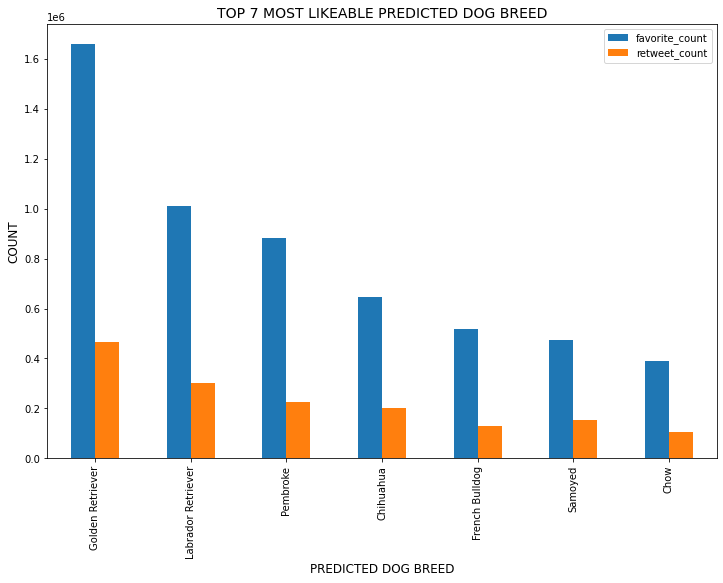

In [61]:
# plot the vertical bar chart of the 7 highest breed using .plot method
liked_breed[:7].plot(kind='bar',figsize=(12,8))
plt.title('TOP 7 MOST LIKEABLE PREDICTED DOG BREED',fontsize=14)
plt.ylabel('COUNT',fontsize=12)
plt.xlabel('PREDICTED DOG BREED',fontsize=12);

The Golden Retriever is the most likeable dog breed. it has the highest favourite count and retweet count. People liked the pictures of a Golden Retriever more than other breeds,hence,more retweets.this is can be due to certain characteristics of the breed such as their friendliness, tolerant attitude that makes them great family pets, and their intelligence makes them highly capable working dogs. 
The second dog breed on the list of the most likeable breed is the Labrador Retriever. Therefore, we can conclude that people tends to love the Retriever breed more based on their characteristics.

Other breeds in the top 7 most likeable breed list are the Pembroke, the Chihuahua, the French Bulldog, the Samoyed and the Chow in descending order of likeness.

In [64]:
# 2.Which dog name is the most common name?

# use the value count method to find out the name with highest entry value
liked_name=twitter_archive_master.dog_name.value_counts()
liked_name.head(10)

Cooper     9
Tucker     9
Penny      8
Lucy       8
Oliver     8
Daisy      7
Winston    7
Charlie    7
Toby       6
Jax        6
Name: dog_name, dtype: int64

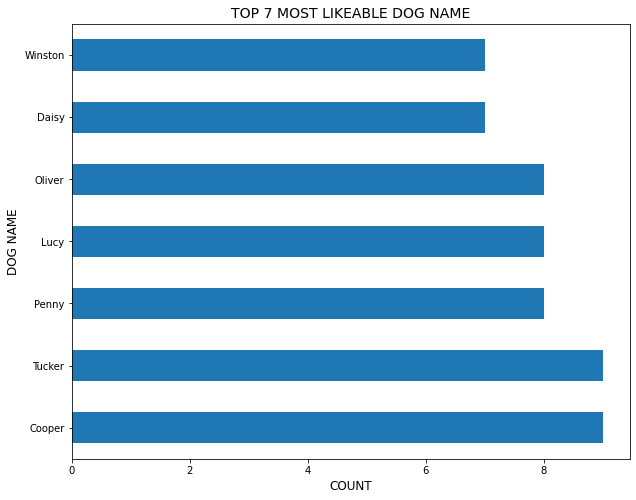

In [63]:
# plot the horizontal bar chart of the 7 most common name using .plot method
liked_name[:7].plot(kind='barh',figsize=(10,8))
plt.title('TOP 7 MOST LIKEABLE DOG NAME',fontsize=14)
plt.xlabel('COUNT',fontsize=12)
plt.ylabel('DOG NAME',fontsize=12);

The most common or popular dog name among dog owners are Tucker and Cooper.

Other common dog names in the top 7 most likeable dog name list are Penny, Lucy, Oliver, Daisy, Winston in descending order.

In [114]:
# install the necessary module to sort out the months and weekdays
pip install sorted-months-weekdays


  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=0c2b8c236ec1649b8fa8865165496aceb76f8077e5d5c1d930eebd2f9607a8db
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\2a\70\02\2addaa9d5ffdc61dcd436a3c6eed123aea9053591367bcf584
Successfully built sorted-months-weekdays


In [115]:
# instal the necessary module to sort out the dataframe months
pip install sort-dataframeby-monthorweek

  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3441 sha256=808c6670f5da35fd43638a31fe0b5e0b3bc179c278223398389be123369a0076
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\94\66\fa\f621d4b2c9c3eeb09cbd33697f4bb60bfe9d3d900d3a59329d
Successfully built sort-dataframeby-monthorweek
Note: you may need to restart the kernel to use updated packages.


In [5]:
# to sort out weekdays and months,import the necessary libraries
from sorted_months_weekdays import *

from sort_dataframeby_monthorweek import *

In [23]:
#3. What is the user_performance of the user of the WeRate Dog twitter account within the 3 years in the dataset?

# split the timestamp to get the month and year column using dt method
twitter_archive_master['year']=twitter_archive_master['timestamp'].dt.year
twitter_archive_master['month']=twitter_archive_master['timestamp'].dt.month
twitter_archive_master['month']= twitter_archive_master['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July', 8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

#group the month and year according to the tweet count
user_performance=twitter_archive_master.groupby(['year','month']).agg(tweet_number=('tweet_id','count'))
user_performance



tweet_number
year month              
2015 Dec             288
     Nov             226
2016 Apr              50
     Aug              46
     Dec              52
     Feb               1
     Jan             131
     July             76
     June             69
     Mar             107
     May              48
     Nov              45
     Oct              60
     Sept             56
2017 Apr              34
     Aug               1
     Feb              59
     Jan              59
     July             46
     June             40
     Mar              42
     May              36

<Figure size 720x576 with 0 Axes>

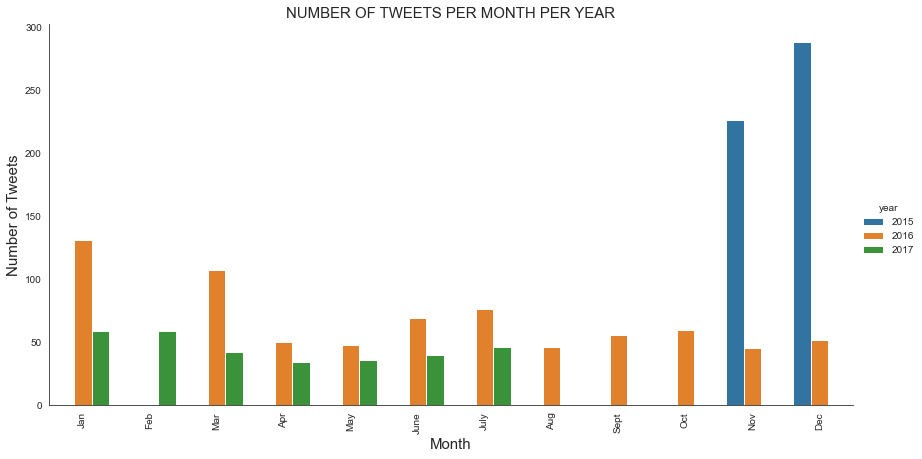

In [71]:
# use seaborn to create a multivariate bar chart
plt.figure(figsize=(10,8))
sns.set_style('white')
month_order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
sns.catplot(data=twitter_archive_master,x='month',hue='year',order=month_order,kind='count',height=6,aspect=2)
plt.xticks(rotation=90)            
plt.xlabel('Month',fontsize=15)
plt.ylabel('Number of Tweets',fontsize=15)
plt.title('NUMBER OF TWEETS PER MONTH PER YEAR',fontsize=15);


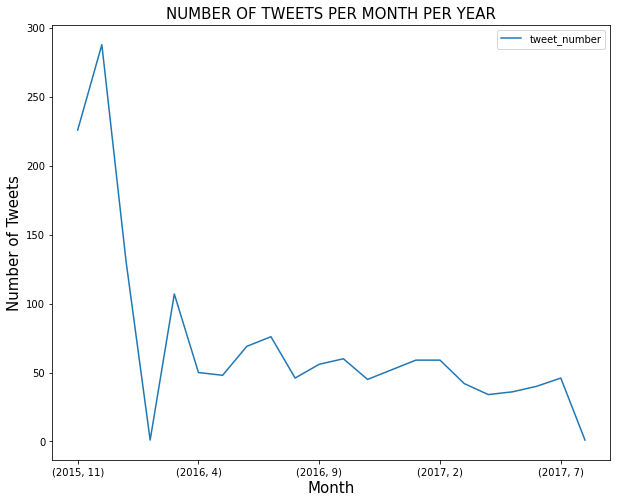

In [20]:
# use line plot to show better visualization
user_performance.plot(figsize=(10,8))
plt.xlabel('Month',fontsize=15)
plt.ylabel('Number of Tweets',fontsize=15)
plt.title('NUMBER OF TWEETS PER MONTH PER YEAR',fontsize=15);

The number of tweets made in 2015 had the highest value despite just having two months recorded in the dataset. The number of tweets posted in 2016 reduced greatly but 2017 has the lowest number of tweets recorded,some months were no recorded also. This can be due to several factors such as low number of dog pictures sent in by WeRateDogs Twitter followers, the WeRateDogs Twitter account handler not available to post tweets,some months were not recorded maybe due to the account having issues with Twitter policies or any other reason.

### CORRELATION BETWEEN VARIABLES

<AxesSubplot:>

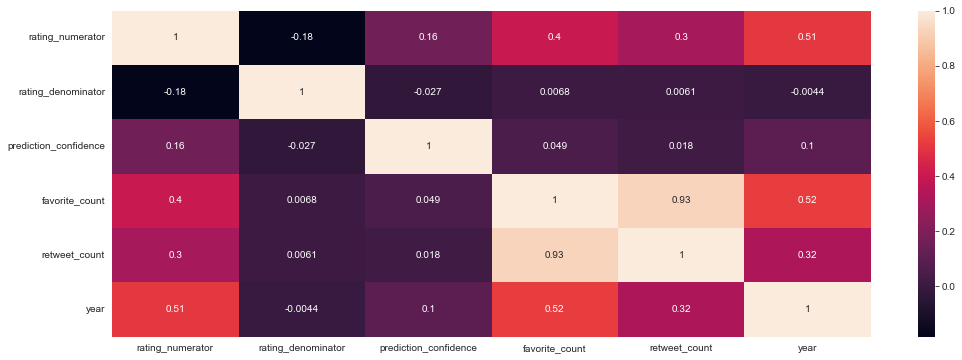

In [81]:
#use seaborn to plot the correlation between each column
plt.figure(figsize=(17,6))
sns.heatmap(twitter_archive_master.corr(),annot=True)

The correlation coefficients in the heatmap above are indicators of the strength of the linear relationship between two different variables, x and y.
A correlation of -1.0 indicates a perfect negative correlation, and a correlation of 1.0 indicates a perfect positive correlation. If the correlation coefficient is greater than zero, it is a positive relationship. Conversely, if the value is less than zero, it is a negative relationship. A value of zero indicates no relationship between the two variables x and y.

# CONCLUSION

   The data wrangling process was carried out to produce a clean dataset despite the various challenges experienced. The analysis and visualization helps to have a clearer view of the dataset. We were able to know the type of breed people love the most and the likely names people give their dogs and many other insights.
     
   One of the limitations encountered was during the gathering process, when requesting for access to Twitter API, the process took a lot of time and while getting the tweets ,some failed in the process therefore the table created from that data has records not up to the number of records in the archive.